In [2]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [3]:
url= "https://collegedunia.com/usa-colleges"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url, headers=headers)

In [4]:
page

<Response [200]>

In [5]:
page.text

'<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1,minimum-scale=1.0, maximum-scale=2.0, user-scalable=yes, shrink-to-fit=no"/><link rel="canonical" href="https://collegedunia.com/usa-colleges"/><link rel="preconnect" href="https://images.collegedunia.com" crossorigin="anonymous" class="jsx-461388297 jsx-2535865099"/><link rel="preload" href="https://images.collegedunia.com/public/asset/font/din/DINPro-Regular.woff2" as="font" type="font/woff2" crossorigin="anonymous" class="jsx-461388297 jsx-2535865099"/><link rel="preload" href="https://images.collegedunia.com/public/asset/font/sourcesans_new.woff2" as="font" type="font/woff2" crossorigin="anonymous" class="jsx-461388297 jsx-2535865099"/><link rel="preload" href="https://images.collegedunia.com/public/asset/font/din/DINPro-Medium.woff2" as="font" type="font/woff2" crossorigin="anonymous" class="jsx-461388297 jsx-2535865099"/><style>@font-face { font-family: 

In [6]:
soup = BeautifulSoup(page.text, "html.parser")

# COLLEGE NAMES

In [7]:
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")

In [8]:
soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")[0].text

'Harvard University, Cambridge'

In [9]:
C[0].text.split(",")[0]

'Harvard University'

In [10]:
C[0].text

'Harvard University, Cambridge'

In [11]:
import numpy as np

In [12]:
COLLEGES = []

In [13]:
for i in C:
    print(i.text.split(",")[0])

Harvard University
Stanford University
Massachusetts Institute of Technology
California Institute of Technology
Princeton University
University of California
Yale University
Columbia University
University of Chicago
University of Pennsylvania
Johns Hopkins University
Cornell University
University of California
University of Michigan
New York University
Duke University
Northwestern University
University of Washington
Carnegie Mellon University
University of California
Georgia Institute of Technology
University of Illinois
University of Texas
Washington University
Brown University
University of California
University of California
University of Southern California
University of North Carolina
Boston University
University of Wisconsin
Emory University
University of California
Vanderbilt University
University of Minnesota - Twin Cities
University of Maryland
Michigan State University
Ohio State University
Dartmouth College
Purdue University
Case Western Reserve University
Georgetown Univers

In [14]:
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])

In [15]:
len(colleges)

50

## LOCATION

In [16]:
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")

In [17]:
L[0].text

'Massachusetts, USA'

In [18]:
for i in L :
    print(i.text)

Massachusetts, USA
California, USA
Massachusetts, USA
California, USA
New Jersey, USA
California, USA
Connecticut, USA
New York, USA
Illinois, USA
Pennsylvania, USA
Maryland, USA
New York, USA
California, USA
Michigan, USA
New York, USA
North Carolina, USA
Illinois, USA
Washington, USA
Pennsylvania, USA
California, USA
Georgia, USA
Illinois, USA
Texas, USA
Missouri, USA
Rhode Island, USA
California, USA
California, USA
California, USA
North Carolina, USA
Massachusetts, USA
Wisconsin, USA
Georgia, USA
California, USA
Tennessee, USA
Minnesota, USA
Maryland, USA
Michigan, USA
Ohio, USA
New Hampshire, USA
Indiana, USA
Ohio, USA
District Of Columbia, USA
Pennsylvania, USA
Texas, USA
Colorado, USA
Florida, USA
Massachusetts, USA
Pennsylvania, USA
New York, USA
Virginia, USA


In [19]:
location = []
for i in L :
    location.append(i.text)

In [20]:
len(location)

50

## ACCEPTANCE RATE

In [21]:
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")

In [22]:
AR[0].text

'5.6%Acceptance Rate'

In [23]:
re.search(r'\b5\.6%', AR[0].text)[0]

'5.6%'

In [24]:
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

In [25]:
len(acceptance_rate)

50

## COURSE FEES

In [26]:
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")

In [27]:
soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")[0].text

'₹50.49L/Yr'

In [28]:
CF[0].text

'₹50.49L/Yr'

In [29]:
course_fees = []
for i in CF:
    print(i.text)

₹50.49L/Yr
₹72.03L/Yr
₹67.74L/Yr
₹49.1L/Yr
₹56.64L/Yr
₹31.77L/Yr
₹40.37L/Yr
₹47.08L/Yr
₹46.83L/Yr
₹31.31L/Yr
₹49.6L/Yr
₹125.79L/Yr
₹25.91L/Yr
₹44.04L/Yr
₹30.62L/Yr
₹52.38L/Yr
₹13.65L/Yr
₹25.35L/Yr
₹49.83L/Yr
₹28.97L/Yr
₹32.51L/Yr
₹26.69L/Yr
₹23.07L/Yr
₹47.36L/Yr
₹54.27L/Yr
₹56.12L/Yr
₹28.15L/Yr
₹32.15L/Yr
₹29.98L/Yr
₹54.48L/Yr
₹21.88L/Yr
₹37.56L/Yr
₹25.7L/Yr
₹57.36L/Yr
₹25.31L/Yr
₹22.2L/Yr
₹20.35L/Yr
₹38.99L/Yr
₹63.57L/Yr
₹17.42L/Yr
₹41.69L/Yr
₹50.19L/Yr
₹39.85L/Yr
₹45.38L/Yr
₹29.46L/Yr
₹25.39L/Yr
₹48.58L/Yr
₹27.39L/Yr
₹49.36L/Yr
₹31.64L/Yr


In [30]:
course_fees = []
for i in CF:  
    course_fees.append(i.text)

In [31]:
len(course_fees)

50

## COURSE NAMES

In [32]:
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")

In [33]:
soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")[0].text

' M.S Data Science'

In [34]:
CN[0].text

' M.S Data Science'

In [35]:
for i in CN:
    print(i.text)

 M.S Data Science
 M.B.A
 M.B.A
 M.S Computer Science
 M.S Computer Science
 M.S Computer Science
 M.S Statistics and Data Science
 M.S Data Science
 M.S Analytics
 M.S Engineering - Data Science
 M.S Biotechnology
 M.B.A
 M.S Computer Science
 M.S Data Science
 M.S Data Science
 M.S Data Science
 M.S Project Management
 M.S Data Science
 M.S Computer Science
 M.S Data Science
 M.S Computer Science
 M.S Computer Science
 M.S Computer Science
 M.S Data Analytics and Statistic...
 M.S Data Science
 M.S Business Analytics
 M.Sc Computer Science
 M.S Computer Science - Data Scie...
 M.S Computer Science
 M.S Computer Science
 M.S Biomedical Data Science
 M.S Business Analytics
 M.S Computer Science
 M.S Data Science
 M.S Data Science
 M.S Data Science and Analytics
 M.S Business Analytics
 M.S Computer Science and Enginee...
 M.B.A
 M.S Business Analytics and Infor...
 M.S Computer Science and Data Sc...
 M.S Data Science for Public Poli...
 M.S Computer Science
 M.C.S
 M.S Data Science
 M

In [36]:
course_name = []
for i in CN:
    course_name.append(i.text)

In [37]:
len(course_name)

50

## EXAMS

In [38]:
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")

In [39]:
soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")[0].text

'GRE292TOEFL100'

In [40]:
EX[0].text

'GRE292TOEFL100'

In [41]:
re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', EX[0].text)

'GRE 292 TOEFL 100'

In [42]:
EXAM1 = []
for i in EX:
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM1.append(regex) 

In [43]:
len(EXAM1)

47

## RANK BY QS  

In [44]:
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")

In [45]:
R[0].text

'Ranked 2 by THE'

In [46]:
R[1].text

'Ranked 4 by QS'

In [47]:
RANKINGS = []
for i in R:
    RANKINGS.append(i.text)

In [48]:
rankings = [
    "Ranked 2 by THE",
    "Ranked 5 by QS",
    "Ranked 3 by THE",
    "Ranked 3 by QS",
    "Ranked 5 by THE",
    "Ranked 1 by QS",
    "Ranked 6 by THE",
    "Ranked 6 by QS",
    "Ranked 7 by THE",
    "Ranked 16 by QS",
    "Ranked 8 by THE",
    "Ranked 27 by QS",
    "Ranked 9 by THE",
    "Ranked 18 by QS",
    "Ranked 11 by THE",
    "Ranked 22 by QS",
    "Ranked 13 by THE",
    "Ranked 10 by QS",
    "Ranked 14 by THE",
    "Ranked 13 by QS",
    "Ranked 15 by THE",
    "Ranked 24 by QS",
    "Ranked 20 by THE",
    "Ranked 20 by QS",
    "Ranked 21 by THE",
    "Ranked 44 by QS",
    "Ranked 23 by THE",
    "Ranked 25 by QS",
    "Ranked 24 by THE",
    "Ranked 39 by QS",
    "Ranked 25 by THE",
    "Ranked 50 by QS",
    "Ranked 26 by THE",
    "Ranked 32 by QS",
    "Ranked 26 by THE",
    "Ranked 80 by QS",
    "Ranked 28 by THE",
    "Ranked 52 by QS",
    "Ranked 32 by THE",
    "Ranked 53 by QS",
    "Ranked 38 by THE",
    "Ranked 88 by QS",
    "Ranked 48 by THE",
    "Ranked 85 by QS",
    "Ranked 50 by THE",
    "Ranked 72 by QS",
    "Ranked 57 by THE",
    "Ranked 118 by QS",
    "Ranked 61 by THE",
    "Ranked 63 by QS",
    "Ranked 63 by THE",
    "Ranked 102 by QS",
    "Ranked 64 by THE",
    "Ranked 149 by QS",
    "Ranked 65 by THE",
    "Ranked 134 by QS",
    "Ranked 69 by THE",
    "Ranked 102 by QS",
    "Ranked 71 by THE",
    "Ranked 108 by QS",
    "Ranked 81 by THE",
    "Ranked 83 by QS",
    "Ranked 82 by THE",
    "Ranked 155 by QS",
    "Ranked 95 by THE",
    "Ranked 235 by QS",
    "Ranked 98 by THE",
    "Ranked 199 by QS",
    "Ranked 101 by THE",
    "Ranked 185 by QS",
    "Ranked 104 by THE",
    "Ranked 164 by QS",
    "Ranked 106 by THE",
    "Ranked 159 by QS",
    "Ranked 112 by THE",
    "Ranked 140 by QS",
    "Ranked 123 by THE",
    "Ranked 205 by QS",
    "Ranked 127 by THE",
    "Ranked 129 by QS",
    "Ranked 134 by THE",
    "Ranked 176 by QS",
    "Ranked 136 by THE",
    "Ranked 281 by QS",
    "Ranked 144 by THE",
    "Ranked 181 by QS",
    "Ranked 147 by THE",
    "Ranked 100 by QS",
    "Ranked 148 by THE",
    "Ranked 317 by QS",
    "Ranked 151 by THE",
    "Ranked 188 by QS",
    "Ranked 151 by THE",
    "Ranked 312 by QS",
    "Ranked 151 by THE",
    "Ranked 93 by QS", 
    "Ranked 154 by THE",
    "Ranked 147 by QS",
    "Ranked 156 by THE",
    "Ranked 253 by QS"  ]


In [49]:
c_rankings = [ranking for ranking in rankings if 'THE' in ranking]

In [50]:
len(c_rankings)

50

## RATINGS

In [51]:
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")

In [52]:
soup.find_all("span", class_= "jsx-3255989801 rating f-13")[0].text

'7.5/10'

In [53]:
rating[0].text

'7.5/10'

In [54]:
for i in rating:
    print(i.text)

7.5/10
8.0/10
8.3/10
8.3/10
7.3/10
8.2/10
7.5/10
6.8/10
7.8/10
8.2/10
8.0/10
6.8/10
6.8/10
7.2/10
8.2/10
8.2/10
7.7/10
8.0/10
6.8/10
7.7/10
8.3/10
5.8/10
10.0/10
6.8/10
8.5/10
8.2/10
7.5/10
8.3/10
7.7/10
7.7/10
8.3/10
8.8/10
9.2/10
5.5/10
6.2/10
7.8/10
8.3/10
8.3/10
5.7/10
5.7/10
6.3/10
6.7/10
7.0/10
7.0/10
6.3/10
7.2/10
7.3/10
7.3/10


In [55]:
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

In [56]:
len(RATINGS)

48

## CREATING DATAFRAME

In [57]:
data = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM1),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(c_rankings)
      }

In [58]:
df = pd.DataFrame(data)

In [59]:
df

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Harvard University,"Massachusetts, USA",5.6%,M.S Data Science,₹50.49L/Yr,GRE 292 TOEFL 100,7.5/10,Ranked 2 by THE
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,8.3/10,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE
5,University of California,"California, USA",16.8%,M.S Computer Science,₹31.77L/Yr,IELTS 7 PTE 54,8.2/10,Ranked 8 by THE
6,Yale University,"Connecticut, USA",6.3%,M.S Statistics and Data Science,₹40.37L/Yr,GRE 322 IELTS 7 PTE 70,7.5/10,Ranked 9 by THE
7,Columbia University,"New York, USA",7%,M.S Data Science,₹47.08L/Yr,GRE 326 TOEFL 101,6.8/10,Ranked 11 by THE
8,University of Chicago,"Illinois, USA",7.9%,M.S Analytics,₹46.83L/Yr,TOEFL 100 PTE 54,7.8/10,Ranked 13 by THE
9,University of Pennsylvania,"Pennsylvania, USA",9.4%,M.S Engineering - Data Science,₹31.31L/Yr,GRE 324 TOEFL 100 PTE 68,8.2/10,Ranked 14 by THE


In [60]:
df["EXAM"][48] = "GRE 296 IELTS 7"

In [61]:
df["EXAM"][49] = "TOEFL 90 PTE 54"

In [62]:
df["EXAM"][33] = np.nan

In [63]:
df["RATING"][49] = "7.3/10"

In [64]:
df["RATING"][48] = np.nan

In [65]:
df["RATING"][2] = np.nan

In [66]:
df

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Harvard University,"Massachusetts, USA",5.6%,M.S Data Science,₹50.49L/Yr,GRE 292 TOEFL 100,7.5/10,Ranked 2 by THE
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,NaN,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE
5,University of California,"California, USA",16.8%,M.S Computer Science,₹31.77L/Yr,IELTS 7 PTE 54,8.2/10,Ranked 8 by THE
6,Yale University,"Connecticut, USA",6.3%,M.S Statistics and Data Science,₹40.37L/Yr,GRE 322 IELTS 7 PTE 70,7.5/10,Ranked 9 by THE
7,Columbia University,"New York, USA",7%,M.S Data Science,₹47.08L/Yr,GRE 326 TOEFL 101,6.8/10,Ranked 11 by THE
8,University of Chicago,"Illinois, USA",7.9%,M.S Analytics,₹46.83L/Yr,TOEFL 100 PTE 54,7.8/10,Ranked 13 by THE
9,University of Pennsylvania,"Pennsylvania, USA",9.4%,M.S Engineering - Data Science,₹31.31L/Yr,GRE 324 TOEFL 100 PTE 68,8.2/10,Ranked 14 by THE


In [67]:
df = df[df.isnull().sum(axis=1) < 2]

In [68]:
df

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Harvard University,"Massachusetts, USA",5.6%,M.S Data Science,₹50.49L/Yr,GRE 292 TOEFL 100,7.5/10,Ranked 2 by THE
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,NaN,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE
5,University of California,"California, USA",16.8%,M.S Computer Science,₹31.77L/Yr,IELTS 7 PTE 54,8.2/10,Ranked 8 by THE
6,Yale University,"Connecticut, USA",6.3%,M.S Statistics and Data Science,₹40.37L/Yr,GRE 322 IELTS 7 PTE 70,7.5/10,Ranked 9 by THE
7,Columbia University,"New York, USA",7%,M.S Data Science,₹47.08L/Yr,GRE 326 TOEFL 101,6.8/10,Ranked 11 by THE
8,University of Chicago,"Illinois, USA",7.9%,M.S Analytics,₹46.83L/Yr,TOEFL 100 PTE 54,7.8/10,Ranked 13 by THE
9,University of Pennsylvania,"Pennsylvania, USA",9.4%,M.S Engineering - Data Science,₹31.31L/Yr,GRE 324 TOEFL 100 PTE 68,8.2/10,Ranked 14 by THE


## SECOND PAGE

In [69]:
url2 = "https://collegedunia.com/usa-colleges/page-2"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url2, headers=headers)
soup =BeautifulSoup(page.text)

 # college names
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")    
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])
    
 # Location
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")
location = []
for i in L :
    location.append(i.text)

 # Acceptance rate
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

 # course name
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")
course_name = []
for i in CN:
    course_name.append(i.text)

# course fees
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")
course_fees = []
for i in CF:  
    course_fees.append(i.text)
    
 # Exam
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")
EXAM = []
for i in soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center") :
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM.append(regex)
        
 # Rating
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

 # Rank
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")
RANKINGS2 = []
for i in R:
    RANKINGS2.append(i.text) 
    
filtered_ranking = [ranking for ranking in RANKINGS2 if 'THE' in ranking]

In [70]:
data2 = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(filtered_ranking)
      }
df2 = pd.DataFrame(data2)

In [71]:
df2

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Arizona State University,"Arizona, USA",83%,M.S Computer Science - Big Data ...,₹25.34L/Yr,Duolingo 105 TOEFL 88 PTE 60,5.8/10,Ranked 156 by THE
1,Northeastern University,"Massachusetts, USA",28.9%,M.S Data Science,₹18.93L/Yr,GRE 298 IELTS 6.5 PTE 53,9.5/10,Ranked 168 by THE
2,Indiana University,"Indiana, USA",78%,M.S Data Science,₹29.04L/Yr,GRE 318 TOEFL 96,8.0/10,Ranked 170 by THE
3,University of Arizona,"Arizona, USA",78.6%,M.S Data Science,₹28.38L/Yr,TOEFL 79 PTE 60,8.7/10,Ranked 180 by THE
4,Texas A&M University,"Texas, USA",67%,M.S Computer Science,₹13.68L/Yr,IELTS 6 PTE 53,7.3/10,Ranked 181 by THE
5,University of Massachusetts,"Massachusetts, USA",65.5%,M.S Computer Science,₹10.18L/Yr,GRE 326 TOEFL 80 PTE 53,7.3/10,Ranked 191 by THE
6,University of California,"California, USA",47%,M.S Computer Science and Enginee...,₹26.24L/Yr,GRE 320 TOEFL 100 PTE 54,6.3/10,Ranked 192 by THE
7,University of Miami,"Florida, USA",37.7%,M.S Computer Science,₹35.75L/Yr,TOEFL 80,8.3/10,Ranked 194 by THE
8,Rutgers University - New Jersey,"New Jersey, USA",58%,M.S Computer Science,₹12.36L/Yr,TOEFL 83 PTE 68,6.8/10,Ranked 201 by THE
9,University of Notre Dame,"Indiana, USA",18.7%,M.S Business Analytics,₹46.99L/Yr,GRE 323 TOEFL 100 PTE 70,7.0/10,Ranked 201 by THE


In [72]:
df2["EXAM"][49] = "TOEFL 100"

In [73]:
df2["RATING"][32] = np.nan

In [74]:
df2["EXAM"][32] = np.nan

In [75]:
df2["EXAM"][44] = np.nan

In [76]:
df2["RATING"][15] = np.nan

In [77]:
df2["RATING"][16] = np.nan

In [78]:
df2["ACCEPTANCE RATE"][24] = np.nan

In [79]:
df2["ACCEPTANCE RATE"][48] = "93%"

In [80]:
df2["ACCEPTANCE RATE"][49] = "75.3%"

In [81]:
df2["RATING"][31] = np.nan

In [82]:
df2["RATING"][38] = np.nan

In [83]:
df2["EXAM"][46] = "GRE 297 TOEFL 80 PTE 54"

In [84]:
df2["RATING"][46] = np.nan

In [85]:
df2["EXAM"][47] = "IELTS 6.5 PTE 53"

In [86]:
df2["EXAM"][48] = "TOEFL 80 PTE 60"

In [87]:
df2["RATING"][41] = "7.0/10"

In [88]:
df2["RATING"][42] = "6.5/10"

In [89]:
df2["RATING"][43] = "8.2/10"

In [90]:
df2["RATING"][45] = "7.0/10"

In [91]:
df2["RATING"][47] = "9.2/10"

In [92]:
df2["RATING"][48] = "6.2/10"

In [93]:
df2["RATING"][44] = np.nan

In [94]:
df2

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Arizona State University,"Arizona, USA",83%,M.S Computer Science - Big Data ...,₹25.34L/Yr,Duolingo 105 TOEFL 88 PTE 60,5.8/10,Ranked 156 by THE
1,Northeastern University,"Massachusetts, USA",28.9%,M.S Data Science,₹18.93L/Yr,GRE 298 IELTS 6.5 PTE 53,9.5/10,Ranked 168 by THE
2,Indiana University,"Indiana, USA",78%,M.S Data Science,₹29.04L/Yr,GRE 318 TOEFL 96,8.0/10,Ranked 170 by THE
3,University of Arizona,"Arizona, USA",78.6%,M.S Data Science,₹28.38L/Yr,TOEFL 79 PTE 60,8.7/10,Ranked 180 by THE
4,Texas A&M University,"Texas, USA",67%,M.S Computer Science,₹13.68L/Yr,IELTS 6 PTE 53,7.3/10,Ranked 181 by THE
5,University of Massachusetts,"Massachusetts, USA",65.5%,M.S Computer Science,₹10.18L/Yr,GRE 326 TOEFL 80 PTE 53,7.3/10,Ranked 191 by THE
6,University of California,"California, USA",47%,M.S Computer Science and Enginee...,₹26.24L/Yr,GRE 320 TOEFL 100 PTE 54,6.3/10,Ranked 192 by THE
7,University of Miami,"Florida, USA",37.7%,M.S Computer Science,₹35.75L/Yr,TOEFL 80,8.3/10,Ranked 194 by THE
8,Rutgers University - New Jersey,"New Jersey, USA",58%,M.S Computer Science,₹12.36L/Yr,TOEFL 83 PTE 68,6.8/10,Ranked 201 by THE
9,University of Notre Dame,"Indiana, USA",18.7%,M.S Business Analytics,₹46.99L/Yr,GRE 323 TOEFL 100 PTE 70,7.0/10,Ranked 201 by THE


In [95]:
df2 = df2[df2.isnull().sum(axis=1) < 2]

In [96]:
df2

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Arizona State University,"Arizona, USA",83%,M.S Computer Science - Big Data ...,₹25.34L/Yr,Duolingo 105 TOEFL 88 PTE 60,5.8/10,Ranked 156 by THE
1,Northeastern University,"Massachusetts, USA",28.9%,M.S Data Science,₹18.93L/Yr,GRE 298 IELTS 6.5 PTE 53,9.5/10,Ranked 168 by THE
2,Indiana University,"Indiana, USA",78%,M.S Data Science,₹29.04L/Yr,GRE 318 TOEFL 96,8.0/10,Ranked 170 by THE
3,University of Arizona,"Arizona, USA",78.6%,M.S Data Science,₹28.38L/Yr,TOEFL 79 PTE 60,8.7/10,Ranked 180 by THE
4,Texas A&M University,"Texas, USA",67%,M.S Computer Science,₹13.68L/Yr,IELTS 6 PTE 53,7.3/10,Ranked 181 by THE
5,University of Massachusetts,"Massachusetts, USA",65.5%,M.S Computer Science,₹10.18L/Yr,GRE 326 TOEFL 80 PTE 53,7.3/10,Ranked 191 by THE
6,University of California,"California, USA",47%,M.S Computer Science and Enginee...,₹26.24L/Yr,GRE 320 TOEFL 100 PTE 54,6.3/10,Ranked 192 by THE
7,University of Miami,"Florida, USA",37.7%,M.S Computer Science,₹35.75L/Yr,TOEFL 80,8.3/10,Ranked 194 by THE
8,Rutgers University - New Jersey,"New Jersey, USA",58%,M.S Computer Science,₹12.36L/Yr,TOEFL 83 PTE 68,6.8/10,Ranked 201 by THE
9,University of Notre Dame,"Indiana, USA",18.7%,M.S Business Analytics,₹46.99L/Yr,GRE 323 TOEFL 100 PTE 70,7.0/10,Ranked 201 by THE


## THIRD PAGE

In [97]:
url2 = "https://collegedunia.com/usa-colleges/page-3"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url2, headers=headers)
soup =BeautifulSoup(page.text)

 # college names
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")    
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])
    
 # Location
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")
location = []
for i in L :
    location.append(i.text)

 # Acceptance rate
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

 # course name
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")
course_name = []
for i in CN:
    course_name.append(i.text)

# course fees
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")
course_fees = []
for i in CF:  
    course_fees.append(i.text)
    
 # Exam
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")
EXAM = []
for i in soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center") :
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM.append(regex)
        
 # Rating
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

 # Rank
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")
RANKINGS3 = []
for i in R:
    RANKINGS3.append(i.text) 
    
filtered_ranking3 = [ranking for ranking in RANKINGS3 if 'THE' in ranking]

In [98]:
data3 = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(filtered_ranking3)
      }
df3 = pd.DataFrame(data3)

In [99]:
df3

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Lincoln University,"Pennsylvania, USA",80%,M.B.A Human Resources Management,₹20.02L/Yr,GMAT 540 TOEFL 79 PTE 58,6.5/10,Ranked 401 by THE
1,University of Nebraska Medical Center,"Nebraska, USA",8%,B.A/B.S Nursing,₹30.14L/Yr,IELTS 6.0 PTE 51,7.8/10,Ranked 401 by THE
2,University of Connecticut,"Connecticut, USA",48.8%,M.S Business Analytics and Proje...,₹42.12L/Yr,TOEFL 79 PTE 53,8.7/10,Ranked 401 by THE
3,Syracuse University,"New York, USA",52.3%,M.S Applied Data Science,₹30.71L/Yr,IELTS 6.5,7.2/10,Ranked 401 by THE
4,University of Tulsa,"Oklahoma, USA",37%,M.S.E Computer Engineering,₹33.19L/Yr,IELTS 6.5,8.7/10,Ranked 401 by THE
5,College of William & Mary,"Virginia, USA",37%,M.S Computer Science,₹28.69L/Yr,IELTS 6 PTE 51,7.2/10,Ranked 401 by THE
6,University at Albany,"New York, USA",57%,M.S Data Science,₹24.4L/Yr,GRE 305 IELTS 6.5 PTE 53,7.8/10,Ranked 501 by THE
7,University of South Carolina,"South Carolina, USA",68%,M.S Health Science,₹14.81L/Yr,TOEFL 80 PTE 53,8.8/10,Ranked 501 by THE
8,Wayne State University,"Michigan, USA",81.5%,M.S Data Science and Business An...,₹8.76L/Yr,GRE 320 TOEFL 79 PTE 58,7.2/10,Ranked 501 by THE
9,Stevens Institute of Technology,"New Jersey, USA",39.1%,M.S Data Science,₹35.38L/Yr,GRE 298 TOEFL 86 PTE 53,6.8/10,Ranked 501 by THE


In [100]:
df3["RATING"][46]= "9.5/10"

In [101]:
df3["RATING"][47]= "8.7/10"

In [102]:
df3["RATING"][48]= "8.0/10"

In [103]:
df3["RATING"][49]= "6.8/10"

In [104]:
df3["ACCEPTANCE RATE"][46]= "60%"

In [105]:
df3["ACCEPTANCE RATE"][47]= "62.6%"

In [106]:
df3["ACCEPTANCE RATE"][48]= "94.1%"

In [107]:
df3["ACCEPTANCE RATE"][49]= "56.7%"

In [108]:
df3["ACCEPTANCE RATE"][21]= np.nan

In [109]:
df3["ACCEPTANCE RATE"][22]= np.nan

In [110]:
df3["ACCEPTANCE RATE"][42]= np.nan

In [111]:
df3["ACCEPTANCE RATE"][43]= np.nan

In [112]:
df3["EXAM"][45]= np.nan

In [113]:
df3["RATING"][42]= np.nan

In [114]:
df3["EXAM"][49] = "GRE 299 TOEFL 79"

In [115]:
df3["EXAM"][48] = "TOEFL 79 PTE 58"

In [116]:
df3["RATING"][39]= "8.2/10"

In [117]:
df3["RATING"][40]= "7.2/10"

In [118]:
df3["RATING"][41]= "7.5/10"

In [119]:
df3["RATING"][43]= "6.8/10"

In [120]:
df3["RATING"][44]= "8.0/10"

In [121]:
df3["RATING"][45]= "7.7/10"

In [122]:
df3["RATING"][32]= np.nan

In [123]:
df3["RATING"][38]= np.nan

In [124]:
df3["RATING"][36]= np.nan

In [125]:
df3["RATING"][0]= np.nan

In [126]:
df3["RATING"][1]= np.nan

In [127]:
df3["RATING"][4]= np.nan

In [128]:
df3["RATING"][8]= np.nan

In [129]:
df3["RATING"][12]= np.nan

In [130]:
df3["RATING"][13]= np.nan

In [131]:
df3["RATING"][18]= np.nan

In [132]:
df3

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Lincoln University,"Pennsylvania, USA",80%,M.B.A Human Resources Management,₹20.02L/Yr,GMAT 540 TOEFL 79 PTE 58,NaN,Ranked 401 by THE
1,University of Nebraska Medical Center,"Nebraska, USA",8%,B.A/B.S Nursing,₹30.14L/Yr,IELTS 6.0 PTE 51,NaN,Ranked 401 by THE
2,University of Connecticut,"Connecticut, USA",48.8%,M.S Business Analytics and Proje...,₹42.12L/Yr,TOEFL 79 PTE 53,8.7/10,Ranked 401 by THE
3,Syracuse University,"New York, USA",52.3%,M.S Applied Data Science,₹30.71L/Yr,IELTS 6.5,7.2/10,Ranked 401 by THE
4,University of Tulsa,"Oklahoma, USA",37%,M.S.E Computer Engineering,₹33.19L/Yr,IELTS 6.5,NaN,Ranked 401 by THE
5,College of William & Mary,"Virginia, USA",37%,M.S Computer Science,₹28.69L/Yr,IELTS 6 PTE 51,7.2/10,Ranked 401 by THE
6,University at Albany,"New York, USA",57%,M.S Data Science,₹24.4L/Yr,GRE 305 IELTS 6.5 PTE 53,7.8/10,Ranked 501 by THE
7,University of South Carolina,"South Carolina, USA",68%,M.S Health Science,₹14.81L/Yr,TOEFL 80 PTE 53,8.8/10,Ranked 501 by THE
8,Wayne State University,"Michigan, USA",81.5%,M.S Data Science and Business An...,₹8.76L/Yr,GRE 320 TOEFL 79 PTE 58,NaN,Ranked 501 by THE
9,Stevens Institute of Technology,"New Jersey, USA",39.1%,M.S Data Science,₹35.38L/Yr,GRE 298 TOEFL 86 PTE 53,6.8/10,Ranked 501 by THE


In [133]:
df3 = df[df3.isnull().sum(axis=1) < 2]

In [134]:
df3

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Harvard University,"Massachusetts, USA",5.6%,M.S Data Science,₹50.49L/Yr,GRE 292 TOEFL 100,7.5/10,Ranked 2 by THE
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,NaN,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE
5,University of California,"California, USA",16.8%,M.S Computer Science,₹31.77L/Yr,IELTS 7 PTE 54,8.2/10,Ranked 8 by THE
6,Yale University,"Connecticut, USA",6.3%,M.S Statistics and Data Science,₹40.37L/Yr,GRE 322 IELTS 7 PTE 70,7.5/10,Ranked 9 by THE
7,Columbia University,"New York, USA",7%,M.S Data Science,₹47.08L/Yr,GRE 326 TOEFL 101,6.8/10,Ranked 11 by THE
8,University of Chicago,"Illinois, USA",7.9%,M.S Analytics,₹46.83L/Yr,TOEFL 100 PTE 54,7.8/10,Ranked 13 by THE
9,University of Pennsylvania,"Pennsylvania, USA",9.4%,M.S Engineering - Data Science,₹31.31L/Yr,GRE 324 TOEFL 100 PTE 68,8.2/10,Ranked 14 by THE


## FOURTH PAGE

In [135]:
url3 = "https://collegedunia.com/usa-colleges/page-4"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url3, headers=headers)
soup =BeautifulSoup(page.text)

 # college names
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")    
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])
    
 # Location
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")
location = []
for i in L :
    location.append(i.text)

 # Acceptance rate
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

 # course name
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")
course_name = []
for i in CN:
    course_name.append(i.text)

# course fees
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")
course_fees = []
for i in CF:  
    course_fees.append(i.text)
    
 # Exam
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")
EXAM = []
for i in soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center") :
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM.append(regex)
        
 # Rating
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

 # Rank
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")
RANKINGS4 = []
for i in R:
    RANKINGS4.append(i.text) 
    
filtered_ranking4 = [ranking for ranking in RANKINGS4 if 'THE' in ranking]

In [136]:
data4 = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(filtered_ranking4)
      }
df4 = pd.DataFrame(data4)

In [137]:
df4

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Marquette University,"Wisconsin, USA",84.3%,M.S Computing,₹39.11L/Yr,IELTS 6.5,6.0/10,Ranked 801 by THE
1,University of Wisconsin,"Wisconsin, USA",72%,M.S Computer Science,₹21.69L/Yr,TOEFL 79 PTE 49,9.0/10,Ranked 801 by THE
2,Mississippi State University,"Mississippi, USA",55.7%,M.S Computer Science,₹11.11L/Yr,GRE 320 TOEFL 84,7.3/10,Ranked 801 by THE
3,Montana State University,"Montana, USA",82.9%,M.S Plant Sciences,₹15.6L/Yr,IELTS 5.5 PTE 48,8.5/10,Ranked 801 by THE
4,The New School,"New York, USA",60.1%,M.S Media Management,₹27.8L/Yr,TOEFL 80,8.5/10,Ranked 801 by THE
5,Old Dominion University,"Virginia, USA",84.6%,M.S Computer Science,₹71.66L/Yr,TOEFL 79 PTE 53,5.0/10,Ranked 801 by THE
6,Chapman University,"California, USA",54%,M.S Computational and Data Scien...,₹22.88L/Yr,GRE 303 IELTS 6.5 PTE 53,8.7/10,Ranked 801 by THE
7,University of Missouri,"Missouri, USA",75.9%,M.S Computer Science,₹25.61L/Yr,TOEFL 79 PTE 53,8.5/10,Ranked 801 by THE
8,Florida Agricultural & Mechanical University,"Florida, USA",52.6%,M.S Agricultural Science,₹29.65L/Yr,GRE 320 TOEFL 79 PTE 59,8.0/10,Ranked 801 by THE
9,University of Alabama,"Alabama, USA",48.4%,M.S Business Analytics,₹25.8L/Yr,GRE 315 TOEFL 90 PTE 61,10.0/10,Ranked 801 by THE


In [138]:
df4["EXAM"][8] = np.nan

In [139]:
df4["EXAM"][13] = np.nan

In [140]:
df4["EXAM"][30] = np.nan

In [141]:
df4["EXAM"][33] = np.nan

In [142]:
df4["EXAM"][46] = "TOEFL 79 PTE 58"

In [143]:
df4["EXAM"][47] = "TOEFL 79 PTE 53"

In [144]:
df4["EXAM"][48] = "GMAT 660 IELTS 7.0"

In [145]:
df4["EXAM"][49] = "GRE 307 TOEFL 79 PTE 53"

In [146]:
df4["RATING"][0] = np.nan

In [147]:
df4["RATING"][0] = np.nan

In [148]:
df4["RATING"][2] = np.nan

In [149]:
df4["RATING"][7] = np.nan

In [150]:
df4["RATING"][8] = np.nan

In [151]:
df4["RATING"][9] = np.nan

In [152]:
df4["RATING"][11] = np.nan

In [153]:
df4["RATING"][12] = np.nan

In [154]:
df4["RATING"][13] = np.nan

In [155]:
df4["RATING"][14] = np.nan

In [156]:
df4["RATING"][15] = np.nan

In [157]:
df4["RATING"][16] = np.nan

In [158]:
df4["RATING"][18] = np.nan

In [159]:
df4["RATING"][21] = np.nan

In [160]:
df4["RATING"][25] = np.nan

In [161]:
df4["RATING"][30] = np.nan

In [162]:
df4["RATING"][33] = np.nan

In [163]:
df4["RATING"][38] = np.nan

In [164]:
df4["ACCEPTANCE RATE"][48] = "45.2%"

In [165]:
df4["ACCEPTANCE RATE"][49] = "71.8%"

In [166]:
df4["ACCEPTANCE RATE"][29] = np.nan

In [167]:
df4["ACCEPTANCE RATE"][8] = np.nan

In [168]:
df4["RATING"][30] = "7.8/10"

In [169]:
df4["RATING"][31] = "6.7/10"

In [170]:
df4["RATING"][32] = "7.2/10"

In [171]:
df4["RATING"][34] = "9.3/10"

In [172]:
df4["RATING"][35] = "8.0/10"

In [173]:
df4["RATING"][37] = "9.2/10"

In [174]:
df4["RATING"][39] = "7.7/10"

In [175]:
df4["RATING"][40] = "9.7/10"

In [176]:
df4["RATING"][41] = "7.8/10"

In [177]:
df4["RATING"][42] = "9.7/10"

In [178]:
df4["RATING"][44] = "8.3/10"

In [179]:
df4["RATING"][45] = "7.2/10"

In [180]:
df4["RATING"][46] = "6.5/10"

In [181]:
df4["RATING"][48] = "7.7/10"

In [182]:
df4["RATING"][49] = "7.0/10"

In [183]:
df4

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Marquette University,"Wisconsin, USA",84.3%,M.S Computing,₹39.11L/Yr,IELTS 6.5,NaN,Ranked 801 by THE
1,University of Wisconsin,"Wisconsin, USA",72%,M.S Computer Science,₹21.69L/Yr,TOEFL 79 PTE 49,9.0/10,Ranked 801 by THE
2,Mississippi State University,"Mississippi, USA",55.7%,M.S Computer Science,₹11.11L/Yr,GRE 320 TOEFL 84,NaN,Ranked 801 by THE
3,Montana State University,"Montana, USA",82.9%,M.S Plant Sciences,₹15.6L/Yr,IELTS 5.5 PTE 48,8.5/10,Ranked 801 by THE
4,The New School,"New York, USA",60.1%,M.S Media Management,₹27.8L/Yr,TOEFL 80,8.5/10,Ranked 801 by THE
5,Old Dominion University,"Virginia, USA",84.6%,M.S Computer Science,₹71.66L/Yr,TOEFL 79 PTE 53,5.0/10,Ranked 801 by THE
6,Chapman University,"California, USA",54%,M.S Computational and Data Scien...,₹22.88L/Yr,GRE 303 IELTS 6.5 PTE 53,8.7/10,Ranked 801 by THE
7,University of Missouri,"Missouri, USA",75.9%,M.S Computer Science,₹25.61L/Yr,TOEFL 79 PTE 53,NaN,Ranked 801 by THE
8,Florida Agricultural & Mechanical University,"Florida, USA",NaN,M.S Agricultural Science,₹29.65L/Yr,NaN,NaN,Ranked 801 by THE
9,University of Alabama,"Alabama, USA",48.4%,M.S Business Analytics,₹25.8L/Yr,GRE 315 TOEFL 90 PTE 61,NaN,Ranked 801 by THE


In [184]:
df4= df4[df4.isnull().sum(axis=1) < 2]

In [185]:
df4

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Marquette University,"Wisconsin, USA",84.3%,M.S Computing,₹39.11L/Yr,IELTS 6.5,NaN,Ranked 801 by THE
1,University of Wisconsin,"Wisconsin, USA",72%,M.S Computer Science,₹21.69L/Yr,TOEFL 79 PTE 49,9.0/10,Ranked 801 by THE
2,Mississippi State University,"Mississippi, USA",55.7%,M.S Computer Science,₹11.11L/Yr,GRE 320 TOEFL 84,NaN,Ranked 801 by THE
3,Montana State University,"Montana, USA",82.9%,M.S Plant Sciences,₹15.6L/Yr,IELTS 5.5 PTE 48,8.5/10,Ranked 801 by THE
4,The New School,"New York, USA",60.1%,M.S Media Management,₹27.8L/Yr,TOEFL 80,8.5/10,Ranked 801 by THE
5,Old Dominion University,"Virginia, USA",84.6%,M.S Computer Science,₹71.66L/Yr,TOEFL 79 PTE 53,5.0/10,Ranked 801 by THE
6,Chapman University,"California, USA",54%,M.S Computational and Data Scien...,₹22.88L/Yr,GRE 303 IELTS 6.5 PTE 53,8.7/10,Ranked 801 by THE
7,University of Missouri,"Missouri, USA",75.9%,M.S Computer Science,₹25.61L/Yr,TOEFL 79 PTE 53,NaN,Ranked 801 by THE
9,University of Alabama,"Alabama, USA",48.4%,M.S Business Analytics,₹25.8L/Yr,GRE 315 TOEFL 90 PTE 61,NaN,Ranked 801 by THE
10,Worcester Polytechnic Institute,"Massachusetts, USA",60.3%,M.S Data Science,₹26.55L/Yr,GMAT 640 IELTS 6.0,7.8/10,Ranked 801 by THE


## FIFTH PAGE

In [186]:
url4 = "https://collegedunia.com/usa-colleges/page-5"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url4, headers=headers)
soup =BeautifulSoup(page.text)

 # college names
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")    
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])
    
 # Location
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")
location = []
for i in L :
    location.append(i.text)

 # Acceptance rate
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

 # course name
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")
course_name = []
for i in CN:
    course_name.append(i.text)

# course fees
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")
course_fees = []
for i in CF:  
    course_fees.append(i.text)
    
 # Exam
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")
EXAM = []
for i in soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center") :
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM.append(regex)
        
 # Rating
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

 # Rank
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")
RANKINGS5 = []
for i in R:
    RANKINGS5.append(i.text) 
    
filtered_ranking5 = [ranking for ranking in RANKINGS5 if 'US News' in ranking]

In [187]:
data5 = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(filtered_ranking5)
      }
df5 = pd.DataFrame(data5)

In [188]:
df5

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Utah State University,"Utah, USA",90.3%,M.A Data Analytics,₹24.35L/Yr,TOEFL 79 PTE 58,10.0/10,Ranked 712 by US News
1,University of Idaho,"Idaho, USA",75.9%,M.S Computer Science,₹11.95L/Yr,TOEFL 79 PTE 53,6.5/10,Ranked 881 by US News
2,University of Mississippi,"Mississippi, USA",78.3%,M.S Pharmaceutical Science,₹22.5L/Yr,GMAT 680 TOEFL 85,9.3/10,Ranked 361 by US News
3,Brigham Young University,"Utah, USA",51%,M.B.A,₹13.01L/Yr,GRE 319 TOEFL 92 PTE 62,6.7/10,Ranked 760 by US News
4,University of San Francisco,"California, USA",71.4%,M.Sc Data Science,₹40.81L/Yr,Duolingo 100 IELTS 6 PTE 50,8.0/10,Ranked 1408 by US News
5,Cleveland State University,"Ohio, USA",87.5%,M.C.S,₹19.76L/Yr,TOEFL 79 PTE 42,8.7/10,Ranked 1211 by US News
6,University of Central Oklahoma,"Oklahoma, USA",69.9%,M.S Business Analytics,₹14.19L/Yr,GMAT 525 IELTS 6.5 PTE 53,9.8/10,Ranked 771 by US News
7,Pacific University,"Oregon, USA",79%,M.B.A,₹41.73L/Yr,TOEFL 80 PTE 54,6.7/10,Ranked 1492 by US News
8,Miami University,"Ohio, USA",65.5%,M.S Business Analytics,₹25.87L/Yr,IELTS 6.0 PTE 41,8.3/10,Ranked 1306 by US News
9,University of Montana,"Montana, USA",92.4%,M.P.H,₹21.11L/Yr,TOEFL 71 PTE 48,7.0/10,Ranked 1175 by US News


In [189]:
df5.loc[41, ["ACCEPTANCE RATE", "RATING", "RANK"]] = ["89.8%", np.nan, "Ranked 855 by US News"]

In [190]:
df5.loc[42, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["62.3%", "IELTS 6.5 PTE 53", np.nan, "Ranked 908 by US News"]

In [191]:
df5.loc[43, ["EXAM","RATING","RANK"]] = ["IELTS 6.0 PTE 53", np.nan, "Ranked 922 by US News"]

In [192]:
df5.loc[44, ["EXAM", "RATING", "RANK"]] = ["IELTS 6.5 PTE 54", np.nan, "Ranked 970 by US News"]

In [193]:
df5.loc[45, ["ACCEPTANCE RATE", "EXAM", "RATING","RANK"]] = ["96%", "IELTS 6.0 PTE 48", np.nan, "Ranked 977 by US News"]

In [194]:
df5.loc[46, ["ACCEPTANCE RATE", "EXAM", "RATING","RANK"]] = ["31.3%", "GRE 306 IELTS 6.5", "7.8/10", "Ranked 983 by US News"]

In [195]:
df5.loc[47, ["EXAM", "RATING", "RANK"]] = ["GRE 296 IELTS 6.5", np.nan, "Ranked 988 by US News"]

In [196]:
df5.loc[48, ["ACCEPTANCE RATE", "COURSE FEES","EXAM", "RATING", "RANK"]] = ["51.1%", "₹21.97L/Yr", "TOEFL 79PTE 53", "7.2/10", "Ranked 1001 by US News"]

In [197]:
df5.loc[49,["ACCEPTANCE RATE","COURSE FEES", "EXAM", "RATING", "RANK"]] = ["43.5%","₹21.28L/Yr", "GRE 314 TOEFL 90", "6.7/10", "Ranked 1011 by US News" ]

In [198]:
df5.loc[27, ["ACCEPTANCE RATE", "EXAM","RATING", "RANK"]] = [np.nan, np.nan, np.nan, "Ranked 266 by US News"]

In [199]:
df5.loc[33, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = [np.nan, np.nan, np.nan, "Ranked 607 by US News"]

In [200]:
df5.loc[28, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = [np.nan, "Duolingo 105 TOEFL 79 PTE 53", "7.3/10", "Ranked 298 by US News"]

In [201]:
df5.loc[29, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["6%", np.nan, np.nan, "Ranked 392 by US News"]

In [202]:
df5.loc[30, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["64.2%", np.nan, np.nan, "Ranked 402 by US News"]

In [203]:
df5.loc[34, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = [np.nan, "GRE 320 TOEFL 79", np.nan, "Ranked 663 by US News"]

In [204]:
df5.loc[36, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = [np.nan, "TOEFL 80 PTE 68", "9.2/10", "Ranked 744 by US News"]

In [205]:
df5.loc[38, ["ACCEPTANCE RATE", "EXAM", "RATING","RANK"]] = [np.nan, "IELTS 6.5 PTE 59", "7.7/10", "Ranked 799 by US News"]

In [206]:
df5.loc[3, ["EXAM","RATING", "RANK"]] = [np.nan, "10.0/10", "Ranked 712 by US News"]

In [207]:
df5.loc[25, ["EXAM", "RANK"]] = [np.nan, "Ranked 89 by US News"]

In [208]:
df5.loc[37, "RATING"] = "8.3/10"

In [209]:
df5.loc[31, ["ACCEPTANCE RATE", "RATING", "RANK"]] = ["25%", np.nan, "Ranked 408 by US News"]

In [210]:
df5.loc[35, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["52.5%", "IELTS 6.5 PTE 53", "5.0/10", "Ranked 738 by US News"]

In [211]:
df5.loc[0, ["RATING", "RANK"]] = [np.nan, np.nan]

In [212]:
df5.loc[1, ["RATING", "RANK"]] = [np.nan, "Ranked 657 by US News"]

In [213]:
df5.loc[4, ["RATING", "RANK"]] = [np.nan ,"Ranked 771 by US News"]

In [214]:
df5.loc[20, ["RATING", "RANK"]] = ["7.5/10", "Ranked 1423 by US News"]

In [215]:
df5.loc[21, ["RATING", "RANK"]] = ["6.3/10", "Ranked 1175 by US News"]

In [216]:
df5.loc[22, ["RATING", "RANK"]] = ["7.2/10", "Ranked 7 by US News"]

In [217]:
df5.loc[23, ["RATING", "RANK"]] = [np.nan, "Ranked 11 by US News"]

In [218]:
df5.loc[24, ["RATING", "RANK"]] = [np.nan, "Ranked 57 by US News"]

In [219]:
df5.loc[37, ["RATING", "RANK"]]= ["8.3/10", "Ranked 788 by US News"]

In [220]:
df5.loc[26, ["RATING", "RANK"]] = [np.nan, "Ranked 135 by US News"]

In [221]:
df5.loc[40, ["RATING", "RANK"]] = [np.nan, "Ranked 833 by US News"]

In [222]:
df5.loc[39, ["RATING", "RANK"]] = [np.nan, "Ranked 804 by US News"]

In [223]:
df5.loc[19,["RATING", "RANK"]] = ["8.3/10", "Ranked 1306 by US News"]

In [224]:
df5.loc[32, ["RATING", "RANK"]] = ["7.3/10","Ranked 575 by US News"]

In [225]:
df5.loc[18, ["RATING", "RANK"]] = ["6.7/10", "Ranked 1492 by US News"]

In [226]:
df5.loc[17, ["RATING", "RANK"]] = ["9.8/10", "Ranked 1211 by US News"]

In [227]:
df5.loc[16, ["RATING", "RANK"]] = ["5.8/10", np.nan]

In [228]:
df5.loc[15, ["RATING", "RANK"]] = ["8.0/10", "Ranked 625 by US News"]

In [229]:
df5.loc[14, ["RATING", "RANK"]]= ["8.7/10", np.nan]

In [230]:
df5.loc[13, ["RATING", "RANK"]] = ["8.0/10", "Ranked 1408 by US News"]

In [231]:
df5.loc[12, ["RATING", "RANK"]] = ["10.0/10", np.nan]

In [232]:
df5.loc[11, ["RATING", "RANK"]] = [np.nan, np.nan]

In [233]:
df5.loc[10, ["RATING", "RANK"]] = [np.nan, np.nan]

In [234]:
df5.loc[9, ["RATING", "RANK"]] = ["6.7/10", np.nan]

In [235]:
df5.loc[8, ["RATING", "RANK"]] = ["7.6/10", np.nan]

In [236]:
df5.loc[7, ["RATING","RANK"]] = ["9.3/10", "Ranked 760 by US News"]

In [237]:
df5.loc[6, ["RATING", "RANK"]] = [np.nan, np.nan]

In [238]:
df5.loc[5, ["RATING", "RANK"]] = ["8.7/10", "Ranked 568 by US News"]

In [239]:
df5.loc[2, ["RATING", "RANK"]] = ["3.8/10", "Ranked 738 by US News"]

In [240]:
df5

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Utah State University,"Utah, USA",90.3%,M.A Data Analytics,₹24.35L/Yr,TOEFL 79 PTE 58,NaN,NaN
1,University of Idaho,"Idaho, USA",75.9%,M.S Computer Science,₹11.95L/Yr,TOEFL 79 PTE 53,NaN,Ranked 657 by US News
2,University of Mississippi,"Mississippi, USA",78.3%,M.S Pharmaceutical Science,₹22.5L/Yr,GMAT 680 TOEFL 85,3.8/10,Ranked 738 by US News
3,Brigham Young University,"Utah, USA",51%,M.B.A,₹13.01L/Yr,NaN,10.0/10,Ranked 712 by US News
4,University of San Francisco,"California, USA",71.4%,M.Sc Data Science,₹40.81L/Yr,Duolingo 100 IELTS 6 PTE 50,NaN,Ranked 771 by US News
5,Cleveland State University,"Ohio, USA",87.5%,M.C.S,₹19.76L/Yr,TOEFL 79 PTE 42,8.7/10,Ranked 568 by US News
6,University of Central Oklahoma,"Oklahoma, USA",69.9%,M.S Business Analytics,₹14.19L/Yr,GMAT 525 IELTS 6.5 PTE 53,NaN,NaN
7,Pacific University,"Oregon, USA",79%,M.B.A,₹41.73L/Yr,TOEFL 80 PTE 54,9.3/10,Ranked 760 by US News
8,Miami University,"Ohio, USA",65.5%,M.S Business Analytics,₹25.87L/Yr,IELTS 6.0 PTE 41,7.6/10,NaN
9,University of Montana,"Montana, USA",92.4%,M.P.H,₹21.11L/Yr,TOEFL 71 PTE 48,6.7/10,NaN


In [241]:
df5 = df[df5.isnull().sum(axis=1) < 2]

In [242]:
df5

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,NaN,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE
5,University of California,"California, USA",16.8%,M.S Computer Science,₹31.77L/Yr,IELTS 7 PTE 54,8.2/10,Ranked 8 by THE
7,Columbia University,"New York, USA",7%,M.S Data Science,₹47.08L/Yr,GRE 326 TOEFL 101,6.8/10,Ranked 11 by THE
8,University of Chicago,"Illinois, USA",7.9%,M.S Analytics,₹46.83L/Yr,TOEFL 100 PTE 54,7.8/10,Ranked 13 by THE
9,University of Pennsylvania,"Pennsylvania, USA",9.4%,M.S Engineering - Data Science,₹31.31L/Yr,GRE 324 TOEFL 100 PTE 68,8.2/10,Ranked 14 by THE
12,University of California,"California, USA",10.8%,M.S Computer Science,₹25.91L/Yr,GRE 326 IELTS 7,6.8/10,Ranked 21 by THE
13,University of Michigan,"Michigan, USA",28%,M.S Data Science,₹44.04L/Yr,IELTS 6.5,7.2/10,Ranked 23 by THE


## SIXTH PAGE

In [243]:
url5 = "https://collegedunia.com/usa-colleges/page-6"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url5, headers=headers)
soup =BeautifulSoup(page.text)

 # college names
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")    
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])
    
 # Location
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")
location = []
for i in L :
    location.append(i.text)

 # Acceptance rate
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

 # course name
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")
course_name = []
for i in CN:
    course_name.append(i.text)

# course fees
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")
course_fees = []
for i in CF:  
    course_fees.append(i.text)
    
 # Exam
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")
EXAM = []
for i in soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center") :
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM.append(regex)
        
 # Rating
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

 # Rank
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")
RANKINGS6 = []
for i in R:
    RANKINGS6.append(i.text) 
    
filtered_ranking6 = [ranking for ranking in RANKINGS6 if 'US News' in ranking]

In [244]:
data6 = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(filtered_ranking6)
      }
df6 = pd.DataFrame(data6)

In [245]:
df6

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,University of North Dakota,"North Dakota, USA",83.7%,M.P.H,₹24.76L/Yr,IELTS 6.0 PTE 50,5.2/10,Ranked 1081 by US News
1,Albany Medical College,"New York, USA",4%,M.S Physician Assistant Studies,₹24.42L/Yr,IELTS 6.5,8.7/10,Ranked 1091 by US News
2,UMass Lowell,"Massachusetts, USA",56.8%,M.S Computer Science,₹18.45L/Yr,IELTS 6 PTE 46,6.3/10,Ranked 1141 by US News
3,South Dakota State University,"South Dakota, USA",90.8%,M.S Data Science,₹17.07L/Yr,TOEFL 83 PTE 48,6.3/10,Ranked 1145 by US News
4,Montclair State University,"New Jersey, USA",66.1%,M.S Computer Science,₹23.82L/Yr,TOEFL 79 PTE 50,9.0/10,Ranked 1167 by US News
5,North Dakota State University,"North Dakota, USA",93%,M.S Computer Science,₹12.57L/Yr,GRE 290 IELTS 6.5 PTE 58,9.0/10,Ranked 1198 by US News
6,California State University,"California, USA",45.6%,M.S Computer Science,₹17.96L/Yr,Duolingo 120 IELTS 6.5 PTE 53,5.5/10,Ranked 1207 by US News
7,Hofstra University,"New York, USA",62.2%,M.S Business Analytics,₹81.62L/Yr,IELTS 6.5 PTE 50,6.2/10,Ranked 1237 by US News
8,Boise State University,"Idaho, USA",81.7%,M.S Computer Science,₹26.57L/Yr,IELTS 6.0 PTE 65,6.2/10,Ranked 1286 by US News
9,East Carolina University,"North Carolina, USA",70.3%,B.S Nursing,₹8.61L/Yr,IELTS 6.0 PTE 53,7.3/10,Ranked 1314 by US News


In [246]:
df6.loc[0, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = [np.nan,"GRE 297 IELTS 6.5 PTE 75",  np.nan]
df6.loc[1, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["83.7%","IELTS 6.0 PTE 50", "5.2/10"]
df6.loc[2, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["4%", np.nan, np.nan]
df6.loc[3, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["56.8%","IELTS 6.5", np.nan]
df6.loc[4, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["90.8%","IELTS 6 PTE 46",  np.nan]
df6.loc[5, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["66.1%","TOEFL 79 PTE 50", "8.7/10"]
df6.loc[6, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["93%","GMAT 530 IELTS 6 PTE 44",  np.nan]
df6.loc[7, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["45.6%","GRE 290 IELTS 6.5 PTE 58", "6.3/10"]
df6.loc[8, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["62.2%","Duolingo 120 IELTS 6.5 PTE 53", "6.3/10"]
df6.loc[9, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["81.7%","IELTS 6.5 PTE 50",  np.nan]
df6.loc[10, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["70.3%","IELTS 6.5 PTE 65","9.0/10"]
df6.loc[11, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["37.6%","IELTS 6.5 PTE 53",  np.nan]
df6.loc[12, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = [np.nan,"TOEFL 79 PTE 59", "5.5/10"]
df6.loc[13, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = [np.nan,"GRE 314 IELTS 6.5 PTE 49", np.nan]
df6.loc[14, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["55.2%","IELTS 7 PTE 62", "6.2/10"]
df6.loc[15, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["69.8%","Duolingo 115 IELTS 6.5 PTE 53", "6.2/10"]
df6.loc[16, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["95%","GMAT 400 TOEFL 79 PTE 57", "7.3/10"]
df6.loc[17, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["60.1%","GRE 296 TOEFL 71", "9.3/10"]
df6.loc[18, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["68.3%","TOEFL 79", np.nan]
df6.loc[19, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["33.8%","IELTS 6.5 PTE 46", "7.2/10"]
df6.loc[20, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["84.1%", np.nan, "7.7/10"]
df6.loc[21, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["48.2%"," GRE 300 IELTS 6.5", "7.8/10"]
df6.loc[22, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["79.2%", "IELTS 5.5 PTE 43", "6.5/10"]
df6.loc[23, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["73.9%", "IELTS 6.0 PTE 48", "8.2/10"]
df6.loc[24, ["ACCEPTANCE RATE", "EXAM", "RATING"]] = ["72.1%", "GMAT 500 TOEFL 80 PTE 58","6.9/10"]
df6.loc[25, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK", "COURSE FEES"]] = [np.nan, np.nan, np.nan, np.nan, np.nan]
df6.loc[26, ["ACCEPTANCE RATE", "RATING", "RANK", "EXAM"]] = [np.nan, np.nan, np.nan, "IELTS 6.5"]
df6.loc[27, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = [np.nan, np.nan, np.nan, np.nan]
df6.loc[28, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["13.7%", "TOEFL 100", np.nan, np.nan]
df6.loc[29, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["89.8%", "GRE 300 IELTS 6.5 PTE 58", np.nan, np.nan]
df6.loc[30, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["21.4%", np.nan, "6.0/10", np.nan]
df6.loc[31, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["38.1%", "GMAT 500 IELTS 6.5", np.nan, np.nan]
df6.loc[32, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["9.4%", np.nan, "8.0/10", np.nan]
df6.loc[33, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["29.9%", "IELTS 7 PTE 68", np.nan, np.nan]
df6.loc[34, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["27.4%", "TOEFL 100 ", np.nan, np.nan]
df6.loc[35, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["10.3%", "IELTS 7", np.nan, np.nan]
df6.loc[36, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["40%",np.nan, "5.0/10", np.nan]
df6.loc[37, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["26%", "GMAT 600 TOEFL 6.5 PTE 65", "6.7/10", np.nan]
df6.loc[38, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["71.4%", "GMAT 500 IELTS", np.nan, np.nan]
df6.loc[39, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["37.2%", np.nan, "8.3/10", np.nan]
df6.loc[40, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["38.5%", "TOEFL 100", np.nan, np.nan]
df6.loc[41, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["14.8%", np.nan, "10.0/10", np.nan]
df6.loc[42, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["48.3%", "IELTS 6.5 PTE 54", "7.0/10", np.nan]
df6.loc[43, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["64.8%", np.nan, np.nan, np.nan]
df6.loc[44, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["22.6%", np.nan, np.nan, np.nan]
df6.loc[45, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["28%", np.nan, np.nan, np.nan]
df6.loc[46, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["17.6%", "IELTS 6.5", np.nan, np.nan]
df6.loc[47, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = [np.nan,"GMAT 530 IELTS 6 PTE 44", np.nan, np.nan]
df6.loc[48, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["61.5%","TOEFL 80 PTE 53",  np.nan, np.nan]
df6.loc[49, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = ["32%", "TOEFL 80 PTE 70",  np.nan, np.nan]

In [247]:
df6

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,University of North Dakota,"North Dakota, USA",NaN,M.P.H,₹24.76L/Yr,GRE 297 IELTS 6.5 PTE 75,NaN,Ranked 1081 by US News
1,Albany Medical College,"New York, USA",83.7%,M.S Physician Assistant Studies,₹24.42L/Yr,IELTS 6.0 PTE 50,5.2/10,Ranked 1091 by US News
2,UMass Lowell,"Massachusetts, USA",4%,M.S Computer Science,₹18.45L/Yr,NaN,NaN,Ranked 1141 by US News
3,South Dakota State University,"South Dakota, USA",56.8%,M.S Data Science,₹17.07L/Yr,IELTS 6.5,NaN,Ranked 1145 by US News
4,Montclair State University,"New Jersey, USA",90.8%,M.S Computer Science,₹23.82L/Yr,IELTS 6 PTE 46,NaN,Ranked 1167 by US News
5,North Dakota State University,"North Dakota, USA",66.1%,M.S Computer Science,₹12.57L/Yr,TOEFL 79 PTE 50,8.7/10,Ranked 1198 by US News
6,California State University,"California, USA",93%,M.S Computer Science,₹17.96L/Yr,GMAT 530 IELTS 6 PTE 44,NaN,Ranked 1207 by US News
7,Hofstra University,"New York, USA",45.6%,M.S Business Analytics,₹81.62L/Yr,GRE 290 IELTS 6.5 PTE 58,6.3/10,Ranked 1237 by US News
8,Boise State University,"Idaho, USA",62.2%,M.S Computer Science,₹26.57L/Yr,Duolingo 120 IELTS 6.5 PTE 53,6.3/10,Ranked 1286 by US News
9,East Carolina University,"North Carolina, USA",81.7%,B.S Nursing,₹8.61L/Yr,IELTS 6.5 PTE 50,NaN,Ranked 1314 by US News


In [248]:
df6 = df6[df6.isnull().sum(axis=1) < 2]

In [249]:
df6

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
1,Albany Medical College,"New York, USA",83.7%,M.S Physician Assistant Studies,₹24.42L/Yr,IELTS 6.0 PTE 50,5.2/10,Ranked 1091 by US News
3,South Dakota State University,"South Dakota, USA",56.8%,M.S Data Science,₹17.07L/Yr,IELTS 6.5,NaN,Ranked 1145 by US News
4,Montclair State University,"New Jersey, USA",90.8%,M.S Computer Science,₹23.82L/Yr,IELTS 6 PTE 46,NaN,Ranked 1167 by US News
5,North Dakota State University,"North Dakota, USA",66.1%,M.S Computer Science,₹12.57L/Yr,TOEFL 79 PTE 50,8.7/10,Ranked 1198 by US News
6,California State University,"California, USA",93%,M.S Computer Science,₹17.96L/Yr,GMAT 530 IELTS 6 PTE 44,NaN,Ranked 1207 by US News
7,Hofstra University,"New York, USA",45.6%,M.S Business Analytics,₹81.62L/Yr,GRE 290 IELTS 6.5 PTE 58,6.3/10,Ranked 1237 by US News
8,Boise State University,"Idaho, USA",62.2%,M.S Computer Science,₹26.57L/Yr,Duolingo 120 IELTS 6.5 PTE 53,6.3/10,Ranked 1286 by US News
9,East Carolina University,"North Carolina, USA",81.7%,B.S Nursing,₹8.61L/Yr,IELTS 6.5 PTE 50,NaN,Ranked 1314 by US News
10,Texas Christian University,"Texas, USA",70.3%,M.S Supply Chain Management,₹24.84L/Yr,IELTS 6.5 PTE 65,9.0/10,Ranked 1335 by US News
11,University of Minnesota- Duluth,"Minnesota, USA",37.6%,M.A Psychological Science (Major...,₹25.31L/Yr,IELTS 6.5 PTE 53,NaN,Ranked 1396 by US News


## SEVENTH PAGE

In [250]:
url6 = "https://collegedunia.com/usa-colleges/page-7"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url6, headers=headers)
soup =BeautifulSoup(page.text)

 # college names
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")    
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])
    
 # Location
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")
location = []
for i in L :
    location.append(i.text)

 # Acceptance rate
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

 # course name
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")
course_name = []
for i in CN:
    course_name.append(i.text)

# course fees
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")
course_fees = []
for i in CF:  
    course_fees.append(i.text)
    
 # Exam
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")
EXAM = []
for i in soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center") :
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM.append(regex)
        
 # Rating
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

 # Rank
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")
RANKINGS7 = []
for i in R:
    RANKINGS7.append(i.text) 
    
filtered_ranking7 = [ranking for ranking in RANKINGS7 if 'FORBES' in ranking]

In [251]:
data7 = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(filtered_ranking7)
      }
df7 = pd.DataFrame(data7)

In [252]:
df7

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Trinity University,"Texas, USA",38%,M.S Health Care Administration,₹33.07L/Yr,IELTS 6.0 PTE 44,7.8/10,Ranked 143 by FORBES
1,Ohio Wesleyan University,"Ohio, USA",71.6%,B.S Data Analytics,₹38.44L/Yr,GRE 296 IELTS 6.5 PTE 58,5.7/10,Ranked 462 by FORBES
2,Brooklyn College,"New York, USA",37.5%,M.A Computer Science,₹23.9L/Yr,TOEFL 69 PTE 45,8.3/10,Ranked 362 by FORBES
3,University of New Orleans,"Louisiana, USA",60.1%,M.S Civil Engineering,₹23.34L/Yr,TOEFL 83,9.2/10,Ranked 616 by FORBES
4,Jackson State University,"Mississippi, USA",63.3%,M.S Computer Science,₹6.25L/Yr,TOEFL 79 PTE 46,9.8/10,Ranked 407 by FORBES
5,Naval Postgraduate School,"California, USA",85%,M.S Computer Science,₹14.47L/Yr,TOEFL 80,8.3/10,Ranked 409 by FORBES
6,St. John's University,"New York, USA",89.4%,M.S Data Science,₹17.98L/Yr,GRE 300 IELTS 6.5,6.7/10,Ranked 42 by FORBES
7,Marshall University,"West Virginia, USA",85%,M.S Cybersecurity,₹11.95L/Yr,IELTS 6.5 PTE 65,7.3/10,Ranked 469 by FORBES
8,South Dakota School of Mines & Technology,"South Dakota, USA",100%,M.S Computational Sciences and R...,₹20.26L/Yr,IELTS 6.5 PTE 57,5.7/10,Ranked 59 by FORBES
9,Idaho State University,"Idaho, USA",23.6%,M.S Civil and Environmental Engi...,₹42.17L/Yr,GRE 298 TOEFL 80,6.7/10,Ranked 320 by FORBES


In [253]:
df7.loc[49, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["43.2%","IELTS 7 PTE 62","₹45.06L/Yr",np.nan, "Ranked 120 by FORBES"]
df7.loc[48, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["31%", np.nan,"₹49.81L/Yr",np.nan,"Ranked 112 by FORBES"]

In [254]:
df7.loc[46, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["61.1%","IELTS 7","₹42.04L/Yr",np.nan, "Ranked 110 by FORBES"]
df7.loc[47, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["61.1%",np.nan,"₹35.97L/Yr","7.0/10", "Ranked 111 by FORBES"]

In [255]:
df7.loc[0, ["ACCEPTANCE RATE", "EXAM", "RATING", "RANK"]] = [np.nan, "IELTS 6 PTE 53", "5.3/10", "Ranked 274 by FORBES"]
df7.loc[6, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "TOEFL 83", np.nan,np.nan]
df7.loc[24, "COURSE FEES"] = np.nan
df7.loc[45, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 107 by FORBES"]
df7.loc[44, ["EXAM", "RATING", "RANK"]] = ["GRE 296 IELTS 7", np.nan, "Ranked 104 by FORBES"]
df7.loc[43, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 102 by FORBES"]
df7.loc[42, ["EXAM", "RATING", "RANK"]] = ["GMAT 650 TOEFL 80", np.nan, "Ranked 101 by FORBES"]
df7.loc[41, ["EXAM", "RATING", "RANK"]] = ["IELTS 7 PTE 68", "8.5/10", "Ranked 92 by FORBES"]
df7.loc[40, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 89 by FORBES"]
df7.loc[39, ["EXAM", "RATING", "RANK"]] = [np.nan, "7.3/10", "Ranked 86 by FORBES"]
df7.loc[38, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 75 by FORBES"]
df7.loc[37, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 71 by FORBES"]
df7.loc[36, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 61 by FORBES"]
df7.loc[35, ["EXAM", "RATING", "RANK"]] = ["TOEFL 100", "9.0/10", "Ranked 57 by FORBES"]
df7.loc[34, ["EXAM", "RATING", "RANK"]] = ["PTE 68", "4.5/10", "Ranked 54 by FORBES"]
df7.loc[33, ["EXAM", "RATING", "RANK"]] = ["TOEFL 100", "7.0/10", "Ranked 50 by FORBES"]
df7.loc[32, ["EXAM", "RATING", "RANK"]] = ["IELTS 7.8", "8.2/10", "Ranked 48 by FORBES"]
df7.loc[31, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 39 by FORBES"]
df7.loc[30, ["EXAM", "RATING", "RANK"]] = ["IELTS 8", "7.7/10", "Ranked 36 by FORBES"]
df7.loc[29, ["EXAM", "RATING", "RANK"]] = ["TOEFL 80", "6.8/10", "Ranked 23 by FORBES"]
df7.loc[28, ["EXAM", "RATING", "RANK"]] = ["IELTS 6.5 PTE 56", "5.5/10", "Ranked 457 by FORBES"]
df7.loc[27, ["EXAM", "RATING", "RANK"]] = ["GRE 292 IELTS 6.5", "8.0/10", "Ranked 425 by FORBES"]
df7.loc[26, ["EXAM", "RATING", "RANK"]] = ["GRE 299 TOEFL 79", "9.0/10", "Ranked 537 by FORBES"]
df7.loc[25, ["EXAM", "RATING", "RANK"]] = ["SAT 1325 TOEFL 110", "6.0/10", "Ranked 105 by FORBES"]
df7.loc[24, ["EXAM", "RATING", "RANK"]] = ["DUOLINGO 115 TOEFL 79 PTE 58", "6.7/10", "Ranked 597 by FORBES"]
df7.loc[23, ["EXAM", "RATING", "RANK"]] = ["DUOLINGO 120 PTE 68", "5.5/10", "Ranked 83 by FORBES"]
df7.loc[22, ["EXAM", "RATING", "RANK"]] = ["TOEFL 79 PTE 53", "5.8/10", "Ranked 551 by FORBES"]
df7.loc[21, ["EXAM", "RATING", "RANK"]] = ["GRE 300 IELTS 6", "4.8/10", "Ranked 329 by FORBES"]
df7.loc[20, ["EXAM", "RATING", "RANK"]] = ["GRE 296 IELTS 6.5 PTE 59", "6.8/10", "Ranked 356 by FORBES"]
df7.loc[19, ["EXAM", "RATING", "RANK"]] = ["GMAT 550 TOEFL 79", "5.8/10", "Ranked 635 by FORBES"]
df7.loc[18, ["EXAM", "RATING", "RANK"]] = ["GMAT 500 TOEFL 79 PTE 54", "4.5/10", "Ranked 312 by FORBES"]
df7.loc[17, ["EXAM", "RATING", "RANK"]] = ["IELTS 70", "4.5/10", "Ranked 44 by FORBES"]
df7.loc[16, ["EXAM", "RATING", "RANK"]] = ["DUOLINGO 100 PTE", "7.3/10", "Ranked 44 by FORBES"]
df7.loc[15, ["EXAM", "RATING", "RANK"]] = ["GRE 298 TOEFL 80", "6.7/10", np.nan]
df7.loc[14, ["EXAM", "RATING", "RANK"]] = ["IELTS 6.5 PTE 57", "8.3/10", "Ranked 320 by FORBES"]
df7.loc[13, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 59 by FORBES"]
df7.loc[12, ["EXAM", "RATING", "RANK"]] = ["IELTS 6.5 PTE 65", "9.8/10", "Ranked 449 by FORBES"]
df7.loc[11, ["EXAM", "RATING", "RANK"]] = ["TOEFL 70 PTE 60", "4.0/10", "Ranked 42 by FORBES"]
df7.loc[10, ["EXAM", "RATING", "RANK"]] = ["GRE 300 IELTS 6.5", "5.9/10", "Ranked 45 by FORBES"]
df7.loc[9, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, np.nan]
df7.loc[8, ["EXAM", "RATING", "RANK"]] = ["TOEFL 80", "9.8/10", "Ranked 409 by FORBES"]
df7.loc[7, ["EXAM", "RATING", "RANK"]] = ["TOEFL 79 PTE 46", "8.3/10", "Ranked 407 by FORBES"]
df7.loc[5, ["EXAM", "RATING", "RANK"]] = ["TOEFL 69 PTE 45", "6.5/10", "Ranked 618 by FORBES"]
df7.loc[4, ["EXAM", "RATING", "RANK"]] = ["GRE 296 IELTS 6.5 PTE 58", np.nan, "Ranked 616 by FORBES"]
df7.loc[3, ["EXAM", "RATING", "RANK"]] = ["IELTS 6.0 PTE 44", "5.7/10", "Ranked 362 by FORBES"]
df7.loc[2, ["EXAM", "RATING", "RANK"]] = [np.nan, np.nan, "Ranked 462 by FORBES"]
df7.loc[1, ["EXAM", "RATING", "RANK"]] = [np.nan, "7.8/10", "Ranked 143 by FORBES"]

In [256]:
df7

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Trinity University,"Texas, USA",NaN,M.S Health Care Administration,₹33.07L/Yr,IELTS 6 PTE 53,5.3/10,Ranked 274 by FORBES
1,Ohio Wesleyan University,"Ohio, USA",71.6%,B.S Data Analytics,₹38.44L/Yr,NaN,7.8/10,Ranked 143 by FORBES
2,Brooklyn College,"New York, USA",37.5%,M.A Computer Science,₹23.9L/Yr,NaN,NaN,Ranked 462 by FORBES
3,University of New Orleans,"Louisiana, USA",60.1%,M.S Civil Engineering,₹23.34L/Yr,IELTS 6.0 PTE 44,5.7/10,Ranked 362 by FORBES
4,Jackson State University,"Mississippi, USA",63.3%,M.S Computer Science,₹6.25L/Yr,GRE 296 IELTS 6.5 PTE 58,NaN,Ranked 616 by FORBES
5,Naval Postgraduate School,"California, USA",85%,M.S Computer Science,₹14.47L/Yr,TOEFL 69 PTE 45,6.5/10,Ranked 618 by FORBES
6,St. John's University,"New York, USA",NaN,M.S Data Science,NaN,TOEFL 83,NaN,NaN
7,Marshall University,"West Virginia, USA",85%,M.S Cybersecurity,₹11.95L/Yr,TOEFL 79 PTE 46,8.3/10,Ranked 407 by FORBES
8,South Dakota School of Mines & Technology,"South Dakota, USA",100%,M.S Computational Sciences and R...,₹20.26L/Yr,TOEFL 80,9.8/10,Ranked 409 by FORBES
9,Idaho State University,"Idaho, USA",23.6%,M.S Civil and Environmental Engi...,₹42.17L/Yr,NaN,NaN,NaN


In [257]:
df7 = df7[df7.isnull().sum(axis=1) < 2]

In [258]:
df7

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Trinity University,"Texas, USA",NaN,M.S Health Care Administration,₹33.07L/Yr,IELTS 6 PTE 53,5.3/10,Ranked 274 by FORBES
1,Ohio Wesleyan University,"Ohio, USA",71.6%,B.S Data Analytics,₹38.44L/Yr,NaN,7.8/10,Ranked 143 by FORBES
3,University of New Orleans,"Louisiana, USA",60.1%,M.S Civil Engineering,₹23.34L/Yr,IELTS 6.0 PTE 44,5.7/10,Ranked 362 by FORBES
4,Jackson State University,"Mississippi, USA",63.3%,M.S Computer Science,₹6.25L/Yr,GRE 296 IELTS 6.5 PTE 58,NaN,Ranked 616 by FORBES
5,Naval Postgraduate School,"California, USA",85%,M.S Computer Science,₹14.47L/Yr,TOEFL 69 PTE 45,6.5/10,Ranked 618 by FORBES
7,Marshall University,"West Virginia, USA",85%,M.S Cybersecurity,₹11.95L/Yr,TOEFL 79 PTE 46,8.3/10,Ranked 407 by FORBES
8,South Dakota School of Mines & Technology,"South Dakota, USA",100%,M.S Computational Sciences and R...,₹20.26L/Yr,TOEFL 80,9.8/10,Ranked 409 by FORBES
10,Washington and Lee University,"Virginia, USA",67.8%,B.A Strategic Communication- Min...,₹29.62L/Yr,GRE 300 IELTS 6.5,5.9/10,Ranked 45 by FORBES
11,California State University,"California, USA",26.1%,M.S Computer Science,₹44.35L/Yr,TOEFL 70 PTE 60,4.0/10,Ranked 42 by FORBES
12,Hamilton College,"New York, USA",73.7%,B.A/B.S Biochemistry and Molecul...,₹42.73L/Yr,IELTS 6.5 PTE 65,9.8/10,Ranked 449 by FORBES


# EIGHTH PAGE

In [259]:
url7 = "https://collegedunia.com/usa-colleges/page-8"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36'}

session = requests.Session()
page = session.get(url7, headers=headers)
soup =BeautifulSoup(page.text)

 # college names
C =soup.find_all("h3", class_ ="jsx-3255989801 mb-0 d-inline")    
colleges= []
for i in C:
    colleges.append(i.text.split(",")[0])
    
 # Location
L = soup.find_all("span", class_ = "jsx-3255989801 text-gray text-md mr-2 text-capitalize")
location = []
for i in L :
    location.append(i.text)

 # Acceptance rate
AR = soup.find_all("span", class_ = "jsx-3255989801 border-left pl-2 text-md text-gray acceptance-rate")
acceptance_rate = []
for i in AR:
    a = i.text
    b = re.findall(r'\b\d+(?:\.\d+)?%', a)
    if len(a)>0:
        acceptance_rate.append(b[0])

 # course name
CN = soup.find_all("a", class_= "jsx-3255989801 text-black font-weight-medium text-lg mb-2")
course_name = []
for i in CN:
    course_name.append(i.text)

# course fees
CF = soup.find_all("span", class_= "jsx-3255989801 fees text-capitalize text-success text-lg font-weight-bold")
course_fees = []
for i in CF:  
    course_fees.append(i.text)
    
 # Exam
EX = soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center")
EXAM = []
for i in soup.find_all("span", class_= "jsx-3255989801 d-flex align-items-center") :
    a = i.text
    regex = re.sub(r'(?<=[a-zA-Z])(?=\d)|(?<=\d)(?=[a-zA-Z])', ' ', a)
    if regex:
        EXAM.append(regex)
        
 # Rating
rating = soup.find_all("span", class_= "jsx-3255989801 rating f-13")
RATINGS = []
for i in rating :
    RATINGS.append(i.text)

 # Rank
R = soup.find_all("span", class_= "jsx-3255989801 rank-container font-weight-medium text-md text-black f-13")
RANKINGS8 = []
for i in R:
    RANKINGS8.append(i.text) 
    
filtered_ranking8 = [ranking for ranking in RANKINGS8 if 'FORBES' in ranking]

In [260]:
data8 = { 
      "UNIVERSITY INFO" : pd.Series(colleges),
      "LOCATION"        : pd.Series(location),
      "ACCEPTANCE RATE" : pd.Series(acceptance_rate),
      "COURSE NAME"     : pd.Series(course_name),
      "COURSE FEES"     : pd.Series(course_fees),
      "EXAM"            : pd.Series(EXAM),
      "RATING"          : pd.Series(RATINGS),
      "RANK"            : pd.Series(filtered_ranking7)
      }
df8 = pd.DataFrame(data8)

In [261]:
df8

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Loyola Marymount University,"California, USA",53.9%,M.S Electrical Engineering,₹17.5L/Yr,GRE 319 TOEFL 100 PTE 53,7.3/10,Ranked 143 by FORBES
1,Furman University,"South Carolina, USA",68%,M.S Chemistry,₹15.17L/Yr,IELTS 7 PTE 68,6.8/10,Ranked 462 by FORBES
2,Connecticut College,"Connecticut, USA",35.1%,B.A/B.S Biology,₹18.71L/Yr,IELTS 6.5 PTE 57,9.2/10,Ranked 362 by FORBES
3,DePauw University,"Indiana, USA",65.3%,B.S Computer Science,₹40.07L/Yr,IELTS 7 PTE 68,9.7/10,Ranked 616 by FORBES
4,Mount Holyoke College,"Massachusetts, USA",52.2%,M.A Mathematics Teaching,₹21.05L/Yr,IELTS 7 PTE 60,7.3/10,Ranked 407 by FORBES
5,Gettysburg College,"Pennsylvania, USA",42.6%,B.A Italian Studies,₹44.68L/Yr,IELTS 6.5 PTE 55,9.0/10,Ranked 409 by FORBES
6,The College of New Jersey,"New Jersey, USA",48.7%,M.S Clinical Nurse Leader,₹30.03L/Yr,GMAT 530 IELTS 6.0 PTE 54,6.8/10,Ranked 42 by FORBES
7,Rhodes College,"Tennessee, USA",51%,M.S Accounting,₹38.14L/Yr,GMAT 540 IELTS 6.0 PTE 56,7.8/10,Ranked 469 by FORBES
8,Denison University,"Ohio, USA",43.6%,B.S Computer Science,₹52.49L/Yr,GMAT 530 IELTS 7 PTE 58,10.0/10,Ranked 59 by FORBES
9,Sarah Lawrence College,"New York, USA",51.8%,M.S Art of Teaching,₹27.53L/Yr,IELTS 6.5 PTE 53,9.0/10,Ranked 320 by FORBES


In [262]:
df8.loc[49, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["78.7%", "₹35.75L/Yr","TOEFL 95",np.nan, "Ranked 264 by FORBES"]

In [263]:
df8.loc[36, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["40%", "₹9.34L/Yr","IELTS 6.5 PTE 58","9.0/10", "Ranked 235 by FORBES"]

df8.loc[48, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["76%", "₹19.79L/Yr",np.nan, np.nan, "Ranked 263 by FORBES"]

df8.loc[47, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["74.1%", "₹17.94L/Yr",np.nan, np.nan, "Ranked 259 by FORBES"]

df8.loc[46, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["69.6%", "₹42.1L/Yr",np.nan, np.nan, "Ranked 257 by FORBES"]

df8.loc[45, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["64.2%", "₹26.57L/Yr","GRE 296 IELTS 6.5 PTE 58", "5.8/10", "Ranked 255 by FORBES"]

df8.loc[44, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["75%", "₹23.88L/Yr","IELTS 6.5 PTE 53", "4.9/10", "Ranked 251 by FORBES"]

df8.loc[43, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["58%", "₹41.44L/Yr","TOEFL 80 IELTS 6.5", "3.8/10", "Ranked 250 by FORBES"]

df8.loc[42, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["76.2%", "₹23.04L/Yr","GMAT 500", "6.0/10", "Ranked 249 by FORBES"]

df8.loc[41, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["84.4%", "₹29.14L/Yr","IELTS 6.5 PTE 58", "8.8/10", "Ranked 247 by FORBES"]

df8.loc[40, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["67%", "₹24.15L/Yr","GMAT 500 IELTS 6.0 PTE 54", "9.3/10", "Ranked 243 by FORBES"]

df8.loc[39, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["60.6%", "₹50.2L/Yr","IELTS 6.5 PTE 53", "8.3/10", "Ranked 241 by FORBES"]

df8.loc[38, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["66%", "₹7.71L/Yr","DUOLINGO 110 IELTS 6.5 PTE 50", "41.03/10", "Ranked 238 by FORBES"]

df8.loc[37, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["71%", "₹7.71L/Yr",np.nan, np.nan,"Ranked 233 by FORBES"]

df8.loc[35, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["58.2%", "₹39.12L/Yr","GMAT 500 IELTS 6.0 PTE 54", "9.3/10", "Ranked 243 by FORBES"]

df8.loc[34, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["67.7%", "₹15.56L/Yr","IELTS 6.0 PTE 53", "9.0/10", "Ranked 232 by FORBES"]

df8.loc[33, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["56.2%", "₹29.47L/Yr","IELTS 7",np.nan, "Ranked 230 by FORBES"]

df8.loc[32, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["79.6%", "₹28.9L/Yr",np.nan, "10./10", "Ranked 225 by FORBES"]

df8.loc[31, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["48.1%", "₹24.76L/Yr","IELTS 7 PTE 58", "6.3/10", "Ranked 222 by FORBES"]

df8.loc[30, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["72.7%", "₹18.31L/Yr","TOEFL 79 PTE 53", "9.3/10", "Ranked 216 by FORBES"]

df8.loc[29, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["76.4%", "₹25.61L/Yr","GMAT 550 TOEFL 90", "8.9/10", "Ranked 215 by FORBES"]

df8.loc[28, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["89%", "₹35.77L/Yr","GMAT 570 IELTS 6.5", "9.0/10", "Ranked 213 by FORBES"]

df8.loc[27, ["ACCEPTANCE RATE", "COURSE FEES", "EXAM", "RATING", "RANK"]] = ["71.2%", "₹46.03L/Yr",np.nan, np.nan, "Ranked 209 by FORBES"]

In [264]:
df8.loc[26, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["71.5%", "GMAT 600 IELTS 6.5", "₹23.21L/Yr", np.nan, "Ranked 204 by FORBES"]

df8.loc[25, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["67.3%", "GMAT 500 TOEFL 79", "₹36.7L/Yr", np.nan, "Ranked 203 by FORBES"]

df8.loc[24, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["84%", "IELTS 6.5 PTE 53", "₹21.2L/Yr", "6.8/10", "Ranked 198 by FORBES"]

df8.loc[23, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["45%", np.nan, "₹22.05L/Yr", "9.0/10", "Ranked 195 by FORBES"]

df8.loc[22, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["63%", "IELTS 6.5 PTE 55", np.nan, np.nan, "Ranked 193 by FORBES"]

df8.loc[21, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["69%", "IELTS 6.0 PTE 48", "₹35.21L/Yr", "7.3/10", "Ranked 192 by FORBES"]

df8.loc[20, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["42%", "IELTS 6.5 PTE 58", "₹21.52L/Yr", "7.0/10", "Ranked 189 by FORBES"]

df8.loc[19, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["55%",np.nan , "₹13.37L/Yr", np.nan, "Ranked 184 by FORBES"]

df8.loc[18, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["48.3%", np.nan, "₹44.59L/Yr", np.nan, "Ranked 179 by FORBES"]

df8.loc[17, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["65.5%", "IELTS 6.5 PTE 53", "₹35.23L/Yr", "9.7/10", "Ranked 175 by FORBES"]

df8.loc[16, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["55%", "GMAT 530 IELTS 7 PTE 58", "₹50.47L/Yr", "7.7/10", "Ranked 172 by FORBES"]

df8.loc[15, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["67.3%", "GMAT 540 IELTS 6.0 PTE 56", "₹14.9L/Yr", "9.2/10", "Ranked 170 by FORBES"]

df8.loc[14, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["83%", "GMAT 530 IELTS 6.0 PTE 54", "₹10.79L/Yr", "6.0/10", "Ranked 169 by FORBES"]

df8.loc[13, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["76%", "IELTS 6.0 PTE 53", "₹41.27L/Yr", "5.4/10", "Ranked 164 by FORBES"]

df8.loc[12, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["46.3%", np.nan, "₹39.82L/Yr", np.nan, "Ranked 163 by FORBES"]

df8.loc[11, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["48%", "IELTS 6.5 PTE 55", "₹44.91L/Yr", "8.2/10", "Ranked 158 by FORBES"]

df8.loc[10, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["51.8%", "TOEFL 70", "₹27.69L/Yr", "7.2/10", "Ranked 157 by FORBES"]
df8.loc[9, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["43.6%", "IELTS 6.0 PTE 53", "₹52.78L/Yr", "6.8/10", "Ranked 153 by FORBES"]
df8.loc[8, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["51%", "IELTS 6.5", "₹38.35L/Yr", "6.0/10", "Ranked 150 by FORBES"]
df8.loc[7, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["48.7%", np.nan, "₹30.2L/Yr", np.nan, np.nan]
df8.loc[6, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["42.6%", "IELTS 7 PTE 60", "₹44.93L/Yr", "6.9/10", "Ranked 138 by FORBES"]
df8.loc[5, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["52.2%", "IELTS 6.7 PTE 68", "₹21.17L/Yr", "7.3/10", "Ranked 137 by FORBES"]
df8.loc[4, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["65.3%", "IELTS 6.5 PTE 57", "₹40.29L/Yr", np.nan, "Ranked 132 by FORBES"]
df8.loc[3, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["35.1%", "IELTS 7 PTE 68", "₹18.81L/Yr", "8.0/10", "Ranked 128 by FORBES"]
df8.loc[2, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["68%", np.nan, "₹15.26L/Yr", np.nan, np.nan]
df8.loc[1, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["53.9%", "GRE 319 TOEFL 100 PTE 53", "₹17.6L/Yr", "8.8/10", "Ranked 124 by FORBES"]
df8.loc[0, ["ACCEPTANCE RATE", "EXAM", "COURSE FEES", "RATING", "RANK"]] = ["78.8%", np.nan, "₹21.03L/Yr", np.nan, "Ranked 122 by FORBES"]

In [265]:
df8

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Loyola Marymount University,"California, USA",78.8%,M.S Electrical Engineering,₹21.03L/Yr,NaN,NaN,Ranked 122 by FORBES
1,Furman University,"South Carolina, USA",53.9%,M.S Chemistry,₹17.6L/Yr,GRE 319 TOEFL 100 PTE 53,8.8/10,Ranked 124 by FORBES
2,Connecticut College,"Connecticut, USA",68%,B.A/B.S Biology,₹15.26L/Yr,NaN,NaN,NaN
3,DePauw University,"Indiana, USA",35.1%,B.S Computer Science,₹18.81L/Yr,IELTS 7 PTE 68,8.0/10,Ranked 128 by FORBES
4,Mount Holyoke College,"Massachusetts, USA",65.3%,M.A Mathematics Teaching,₹40.29L/Yr,IELTS 6.5 PTE 57,NaN,Ranked 132 by FORBES
5,Gettysburg College,"Pennsylvania, USA",52.2%,B.A Italian Studies,₹21.17L/Yr,IELTS 6.7 PTE 68,7.3/10,Ranked 137 by FORBES
6,The College of New Jersey,"New Jersey, USA",42.6%,M.S Clinical Nurse Leader,₹44.93L/Yr,IELTS 7 PTE 60,6.9/10,Ranked 138 by FORBES
7,Rhodes College,"Tennessee, USA",48.7%,M.S Accounting,₹30.2L/Yr,NaN,NaN,NaN
8,Denison University,"Ohio, USA",51%,B.S Computer Science,₹38.35L/Yr,IELTS 6.5,6.0/10,Ranked 150 by FORBES
9,Sarah Lawrence College,"New York, USA",43.6%,M.S Art of Teaching,₹52.78L/Yr,IELTS 6.0 PTE 53,6.8/10,Ranked 153 by FORBES


In [266]:
df8 = df8[df8.isnull().sum(axis=1) < 2]

In [267]:
df8

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
1,Furman University,"South Carolina, USA",53.9%,M.S Chemistry,₹17.6L/Yr,GRE 319 TOEFL 100 PTE 53,8.8/10,Ranked 124 by FORBES
3,DePauw University,"Indiana, USA",35.1%,B.S Computer Science,₹18.81L/Yr,IELTS 7 PTE 68,8.0/10,Ranked 128 by FORBES
4,Mount Holyoke College,"Massachusetts, USA",65.3%,M.A Mathematics Teaching,₹40.29L/Yr,IELTS 6.5 PTE 57,NaN,Ranked 132 by FORBES
5,Gettysburg College,"Pennsylvania, USA",52.2%,B.A Italian Studies,₹21.17L/Yr,IELTS 6.7 PTE 68,7.3/10,Ranked 137 by FORBES
6,The College of New Jersey,"New Jersey, USA",42.6%,M.S Clinical Nurse Leader,₹44.93L/Yr,IELTS 7 PTE 60,6.9/10,Ranked 138 by FORBES
8,Denison University,"Ohio, USA",51%,B.S Computer Science,₹38.35L/Yr,IELTS 6.5,6.0/10,Ranked 150 by FORBES
9,Sarah Lawrence College,"New York, USA",43.6%,M.S Art of Teaching,₹52.78L/Yr,IELTS 6.0 PTE 53,6.8/10,Ranked 153 by FORBES
10,St. Lawrence University,"New York, USA",51.8%,B.S Biology and Physics,₹27.69L/Yr,TOEFL 70,7.2/10,Ranked 157 by FORBES
11,Manhattan School of Music,"New York, USA",48%,B.A/B.S Flute,₹44.91L/Yr,IELTS 6.5 PTE 55,8.2/10,Ranked 158 by FORBES
13,Samford University,"Alabama, USA",76%,M.B.A,₹41.27L/Yr,IELTS 6.0 PTE 53,5.4/10,Ranked 164 by FORBES


In [268]:
## CREATING FINAL DATAFRAME

In [269]:
final_data = pd.concat([df, df2, df3, df4, df5, df6, df7, df8])

In [270]:
final_data

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Harvard University,"Massachusetts, USA",5.6%,M.S Data Science,₹50.49L/Yr,GRE 292 TOEFL 100,7.5/10,Ranked 2 by THE
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,NaN,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE
...,...,...,...,...,...,...,...,...
42,The College of Wooster,"Ohio, USA",76.2%,B.S Computer Science,₹23.04L/Yr,GMAT 500,6.0/10,Ranked 249 by FORBES
43,University of Scranton,"Pennsylvania, USA",58%,M.S Software Engineering,₹41.44L/Yr,TOEFL 80 IELTS 6.5,3.8/10,Ranked 250 by FORBES
44,California Lutheran University,"California, USA",75%,M.S Information Technology,₹23.88L/Yr,IELTS 6.5 PTE 53,4.9/10,Ranked 251 by FORBES
45,Beloit College,"Wisconsin, USA",64.2%,B.S Computer Science,₹26.57L/Yr,GRE 296 IELTS 6.5 PTE 58,5.8/10,Ranked 255 by FORBES


In [271]:
final_data.to_csv("UScollege_info.csv")

In [272]:
pwd

'C:\\Users\\utkar\\WEB SCRAPING PROJECT'

In [273]:
final_data.isnull().sum()

UNIVERSITY INFO     0
LOCATION            0
ACCEPTANCE RATE     3
COURSE NAME         0
COURSE FEES         1
EXAM               10
RATING             40
RANK               19
dtype: int64

In [274]:
final_data

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Harvard University,"Massachusetts, USA",5.6%,M.S Data Science,₹50.49L/Yr,GRE 292 TOEFL 100,7.5/10,Ranked 2 by THE
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,NaN,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE
...,...,...,...,...,...,...,...,...
42,The College of Wooster,"Ohio, USA",76.2%,B.S Computer Science,₹23.04L/Yr,GMAT 500,6.0/10,Ranked 249 by FORBES
43,University of Scranton,"Pennsylvania, USA",58%,M.S Software Engineering,₹41.44L/Yr,TOEFL 80 IELTS 6.5,3.8/10,Ranked 250 by FORBES
44,California Lutheran University,"California, USA",75%,M.S Information Technology,₹23.88L/Yr,IELTS 6.5 PTE 53,4.9/10,Ranked 251 by FORBES
45,Beloit College,"Wisconsin, USA",64.2%,B.S Computer Science,₹26.57L/Yr,GRE 296 IELTS 6.5 PTE 58,5.8/10,Ranked 255 by FORBES


## DATA WRANGLING

In [275]:
final_data.shape

(324, 8)

In [276]:
final_data.size

2592

In [277]:
final_data.head(5)

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
0,Harvard University,"Massachusetts, USA",5.6%,M.S Data Science,₹50.49L/Yr,GRE 292 TOEFL 100,7.5/10,Ranked 2 by THE
1,Stanford University,"California, USA",4.8%,M.B.A,₹72.03L/Yr,GMAT 730 TOEFL 100 PTE 68,8.0/10,Ranked 3 by THE
2,Massachusetts Institute of Technology,"Massachusetts, USA",8.45%,M.B.A,₹67.74L/Yr,GRE 311 TOEFL 90,NaN,Ranked 5 by THE
3,California Institute of Technology,"California, USA",8.8%,M.S Computer Science,₹49.1L/Yr,GRE 296 TOEFL 110,8.3/10,Ranked 6 by THE
4,Princeton University,"New Jersey, USA",6.5%,M.S Computer Science,₹56.64L/Yr,GRE 298 TOEFL 100,7.3/10,Ranked 7 by THE


In [278]:
final_data.tail(5)

,UNIVERSITY INFO,LOCATION,ACCEPTANCE RATE,COURSE NAME,COURSE FEES,EXAM,RATING,RANK
42,The College of Wooster,"Ohio, USA",76.2%,B.S Computer Science,₹23.04L/Yr,GMAT 500,6.0/10,Ranked 249 by FORBES
43,University of Scranton,"Pennsylvania, USA",58%,M.S Software Engineering,₹41.44L/Yr,TOEFL 80 IELTS 6.5,3.8/10,Ranked 250 by FORBES
44,California Lutheran University,"California, USA",75%,M.S Information Technology,₹23.88L/Yr,IELTS 6.5 PTE 53,4.9/10,Ranked 251 by FORBES
45,Beloit College,"Wisconsin, USA",64.2%,B.S Computer Science,₹26.57L/Yr,GRE 296 IELTS 6.5 PTE 58,5.8/10,Ranked 255 by FORBES
49,Calvin College,"Michigan, USA",78.7%,M.A Accounting,₹35.75L/Yr,TOEFL 95,NaN,Ranked 264 by FORBES


In [279]:
final_data.dtypes

UNIVERSITY INFO    object
LOCATION           object
ACCEPTANCE RATE    object
COURSE NAME        object
COURSE FEES        object
EXAM               object
RATING             object
RANK               object
dtype: object

## DATA CLEANING

 - TYPE CONVERSION

In [280]:
final_data["ACCEPTANCE RATE"] = final_data["ACCEPTANCE RATE"].astype(str).str.rstrip('%').astype(float)
final_data["RATING"] = final_data["RATING"].str.extract('(\d+\.?\d*)').astype('float')
final_data["COURSE FEES"] = final_data["COURSE FEES"].str.replace('₹', '').str.replace('L/Yr', '').astype('float')

In [281]:
final_data.columns

Index(['UNIVERSITY INFO', 'LOCATION', 'ACCEPTANCE RATE', 'COURSE NAME',
       'COURSE FEES', 'EXAM', 'RATING', 'RANK'],
      dtype='object')

In [282]:
final_data.columns = ['UNIVERSITY', 'LOCATION', 'ACCEPTANCE RATE(IN %)', 'COURSE NAME',
       'COURSE FEES(IN L/Yr)', 'EXAM', 'RATING(10/10)', 'RANK']

In [283]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNIVERSITY             324 non-null    object 
 1   LOCATION               324 non-null    object 
 2   ACCEPTANCE RATE(IN %)  321 non-null    float64
 3   COURSE NAME            324 non-null    object 
 4   COURSE FEES(IN L/Yr)   323 non-null    float64
 5   EXAM                   314 non-null    object 
 6   RATING(10/10)          284 non-null    float64
 7   RANK                   305 non-null    object 
dtypes: float64(3), object(5)
memory usage: 22.8+ KB


# FINDING NULL VALUES

In [284]:
final_data.isnull() # Using isnull function will return the series of a boolean values the comfirm null areas

,UNIVERSITY,LOCATION,ACCEPTANCE RATE(IN %),COURSE NAME,COURSE FEES(IN L/Yr),EXAM,RATING(10/10),RANK
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
42,False,False,False,False,False,False,False,False
43,False,False,False,False,False,False,False,False
44,False,False,False,False,False,False,False,False
45,False,False,False,False,False,False,False,False


In [285]:
final_data.isnull().sum()  # This will generate total null values in the dataset

UNIVERSITY                0
LOCATION                  0
ACCEPTANCE RATE(IN %)     3
COURSE NAME               0
COURSE FEES(IN L/Yr)      1
EXAM                     10
RATING(10/10)            40
RANK                     19
dtype: int64

<AxesSubplot:>

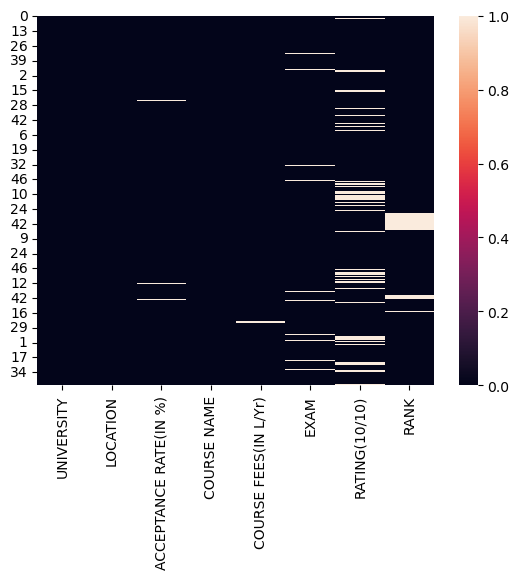

In [286]:
import seaborn as sns
# using seaborn to vizualize the nullvalues in the data set
sns.heatmap(final_data.isnull())

# HANDLING MISSING VALUES

In [287]:
final_data["COURSE FEES(IN L/Yr)"].mean()

33.59349845201238

In [288]:
np.round(final_data["COURSE FEES(IN L/Yr)"].mean())

34.0

In [289]:
final_data["COURSE FEES(IN L/Yr)"].median()

29.98

- FILLING MISSING VALUES WITH MEDIAN


In [290]:
final_data['COURSE FEES(IN L/Yr)'] = final_data['COURSE FEES(IN L/Yr)'].fillna(26.40)

In [291]:
final_data["ACCEPTANCE RATE(IN %)"].median()

48.0

In [292]:
final_data["ACCEPTANCE RATE(IN %)"] = final_data["ACCEPTANCE RATE(IN %)"].fillna(48.3)

In [293]:
final_data.isnull().sum()

UNIVERSITY                0
LOCATION                  0
ACCEPTANCE RATE(IN %)     0
COURSE NAME               0
COURSE FEES(IN L/Yr)      0
EXAM                     10
RATING(10/10)            40
RANK                     19
dtype: int64

In [298]:
final_data = final_data.dropna()

In [300]:
final_data.isnull().sum()

UNIVERSITY               0
LOCATION                 0
ACCEPTANCE RATE(IN %)    0
COURSE NAME              0
COURSE FEES(IN L/Yr)     0
EXAM                     0
RATING(10/10)            0
RANK                     0
dtype: int64

In [301]:
final_data["ACCEPTANCE RATE(IN %)"].unique()

array([  5.6,   4.8,   8.8,   6.5,  16.8,   6.3,   7. ,   7.9,   9.4,
        12.8,  14.1,  10.8,  28. ,  31.9,  45.4,  21.7,  34. ,  23. ,
        66. ,  40. ,  17. ,   9.3,  38. ,  36. ,  12.9,  30.5,  29.4,
        57.6,  25.3,  38.7,  51. ,  44. ,  65.7,  49.4,  10.6,  56. ,
        35.4,  16.9,  55. ,  15.3,  79.6,  45.9,  14.3,  30. ,  83. ,
        28.9,  78. ,  78.6,  67. ,  65.5,  47. ,  37.7,  58. ,  18.7,
        40.2,  71. ,  31.1,  73.6,  76.4,  59.4,  65. ,  81. ,  80.7,
        76.3,  52.2,  48.3,  64.7,  40.7,  33.4,  45. ,  37. ,  72. ,
        48. ,  62. ,  30.3,  58.8,  57.1,  53.5,  73.5,  40.4,  75.3,
        93. ,  82.9,  60.1,  84.6,  54. ,  60.3,  68.2,  86. ,  88.1,
        92.9,  82.3,  71.1,  71.8,  50.8,  83.7,  66.1,  45.6,  62.2,
        70.3,  55.2,  69.8,  95. ,  33.8,  48.2,  79.2,  73.9,  85. ,
       100. ,  67.8,  26.1,  73.7,  28.6,  70. ,  57.2,  32.5,  86.2,
        35. ,  64.5,  13. ,  17.4,  22. ,  22.1,  13.5,  26.9,  26.6,
        45.8,  53.9,

In [302]:
final_data["LOCATION"].unique()

array(['Massachusetts, USA', 'California, USA', 'New Jersey, USA',
       'Connecticut, USA', 'New York, USA', 'Illinois, USA',
       'Pennsylvania, USA', 'Maryland, USA', 'Michigan, USA',
       'North Carolina, USA', 'Washington, USA', 'Georgia, USA',
       'Texas, USA', 'Missouri, USA', 'Rhode Island, USA',
       'Wisconsin, USA', 'Minnesota, USA', 'Ohio, USA',
       'New Hampshire, USA', 'Indiana, USA', 'District Of Columbia, USA',
       'Colorado, USA', 'Florida, USA', 'Virginia, USA', 'Arizona, USA',
       'Utah, USA', 'Iowa, USA', 'Tennessee, USA', 'Louisiana, USA',
       'Delaware, USA', 'Kansas, USA', 'Montana, USA', 'Oregon, USA',
       'North Dakota, USA', 'Idaho, USA', 'Mississippi, USA',
       'South Carolina, USA', 'West Virginia, USA', 'South Dakota, USA',
       'Alaska, USA', 'Vermont, USA', 'Maine, USA', 'Alabama, USA'],
      dtype=object)

In [303]:
final_data["LOCATION"].nunique()

43

In [304]:
final_data["COURSE NAME"].nunique()

80

In [305]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='COURSE FEES(IN L/Yr)', ylabel='Density'>

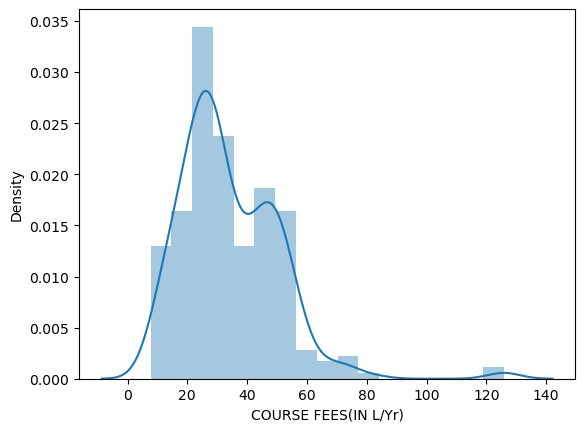

In [306]:
sns.distplot(final_data["COURSE FEES(IN L/Yr)"])

In [307]:
final_data["COURSE FEES(IN L/Yr)"].skew()

1.613951545285842

In [308]:
np.round(final_data["COURSE FEES(IN L/Yr)"].skew())

2.0

In [309]:
final_data["COURSE FEES(IN L/Yr)"].max()

125.79

In [310]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 45
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNIVERSITY             255 non-null    object 
 1   LOCATION               255 non-null    object 
 2   ACCEPTANCE RATE(IN %)  255 non-null    float64
 3   COURSE NAME            255 non-null    object 
 4   COURSE FEES(IN L/Yr)   255 non-null    float64
 5   EXAM                   255 non-null    object 
 6   RATING(10/10)          255 non-null    float64
 7   RANK                   255 non-null    object 
dtypes: float64(3), object(5)
memory usage: 17.9+ KB


In [311]:
final_data.describe()

,ACCEPTANCE RATE(IN %),COURSE FEES(IN L/Yr),RATING(10/10)
count,255.000000,255.000000,255.000000
mean,44.039608,34.076275,7.605216
std,25.355466,16.520964,2.410025
min,4.800000,7.710000,3.800000
25%,21.850000,22.960000,6.800000
50%,44.000000,30.510000,7.700000
75%,65.700000,45.380000,8.300000
max,100.000000,125.790000,41.030000


<AxesSubplot:xlabel='COURSE FEES(IN L/Yr)'>

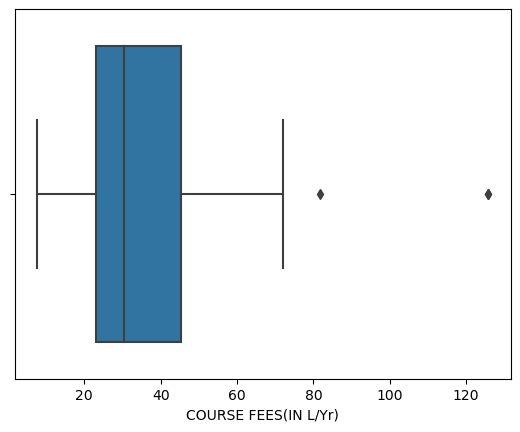

In [312]:
sns.boxplot(final_data["COURSE FEES(IN L/Yr)"])

In [313]:
from scipy import stats
threshold = 3  # Adjust the threshold value as needed

z_scores = stats.zscore(final_data["COURSE FEES(IN L/Yr)"])
final_data = final_data[(abs(z_scores) <= threshold)]


<AxesSubplot:xlabel='COURSE FEES(IN L/Yr)'>

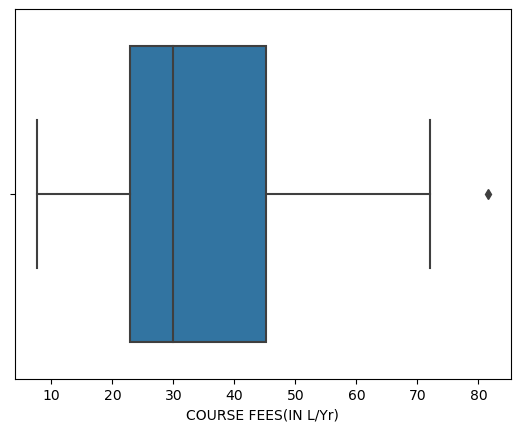

In [314]:
sns.boxplot(final_data["COURSE FEES(IN L/Yr)"])

In [315]:
column_name = "COURSE FEES(IN L/Yr)"

Q1 = final_data["COURSE FEES(IN L/Yr)"].quantile(0.25)
Q3 = final_data["COURSE FEES(IN L/Yr)"].quantile(0.75)
IQR = Q3 - Q1

outliers = final_data[(final_data[column_name] < Q1 - 1.5 * IQR) | (final_data[column_name] > Q3 + 1.5 * IQR)]


In [316]:
outliers 

,UNIVERSITY,LOCATION,ACCEPTANCE RATE(IN %),COURSE NAME,COURSE FEES(IN L/Yr),EXAM,RATING(10/10),RANK
7,Hofstra University,"New York, USA",45.6,M.S Business Analytics,81.62,GRE 290 IELTS 6.5 PTE 58,6.3,Ranked 1237 by US News


## EDA VIZUALIZATION

### -Uni variate Analysis
### - Bi variate Analysis
### - Multi variate Analysis

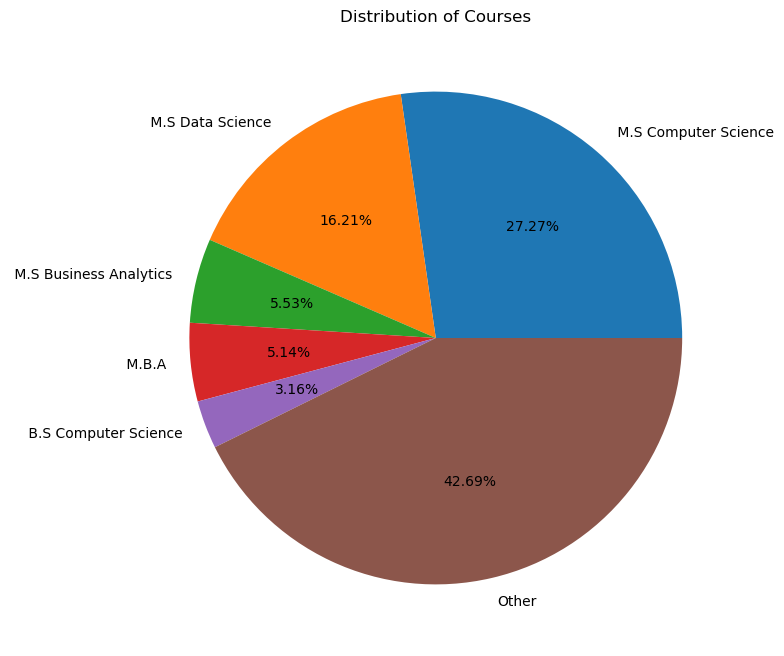

In [317]:
import matplotlib.pyplot as plt

# Count the frequency of each course
course_counts = final_data["COURSE NAME"].value_counts()

# Set a threshold for grouping less frequent courses
threshold = 0.02  # Adjust this value as needed

# Identify courses below the threshold
small_courses = course_counts[course_counts < threshold * len(final_data)]

# Group small courses into an "Other" category
other_count = small_courses.sum()
course_counts = course_counts[course_counts >= threshold * len(final_data)]
course_counts["Other"] = other_count

# Generate the pie chart
plt.figure(figsize=(16, 8))
explode = [0.1 if course == "Python" else 0 for course in course_counts.index]  # Explode the "Python" slice
plt.pie(course_counts, labels=course_counts.index, autopct="%0.2f%%", explode=explode)
plt.title("Distribution of Courses")
plt.show()


## BIVARIATE ANALYSIS

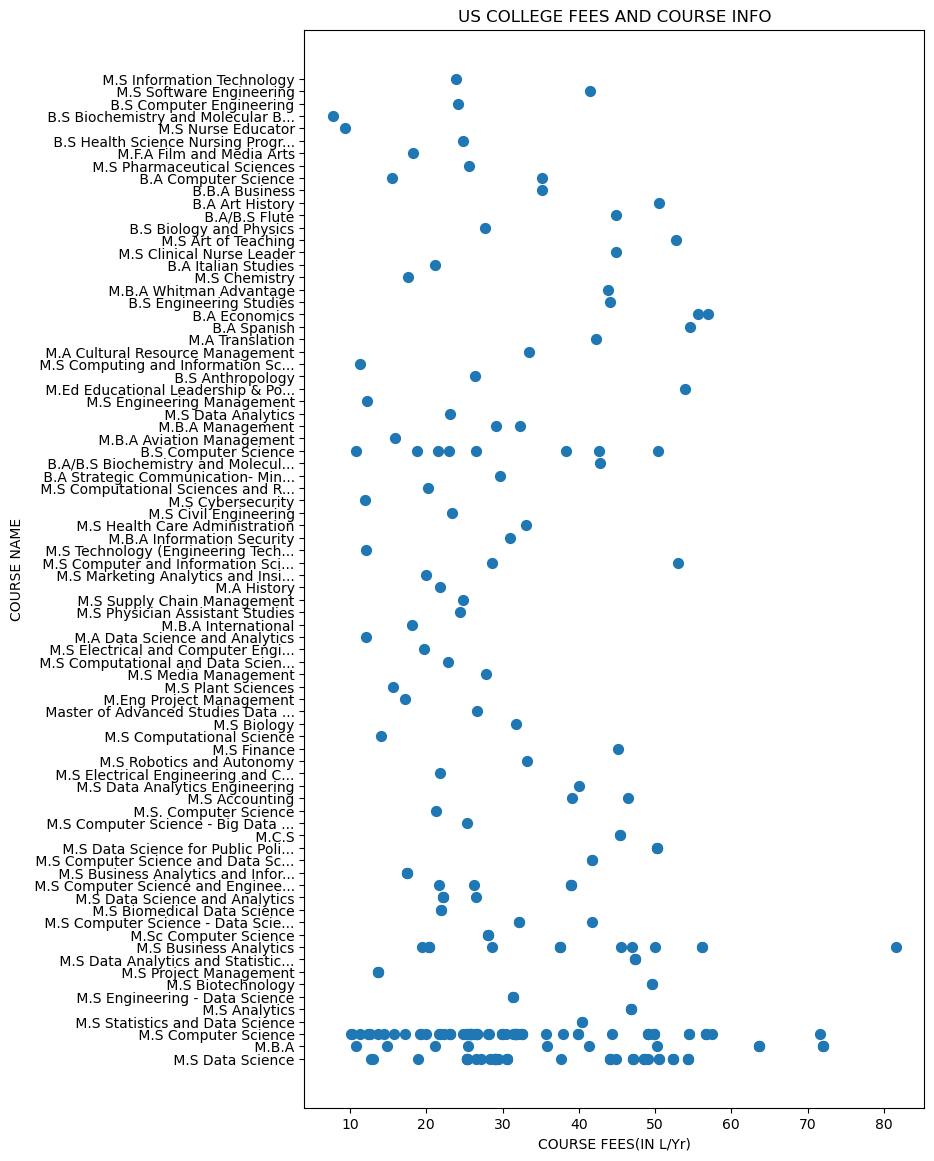

In [318]:
plt.figure(figsize=(8, 14))
plt.scatter(final_data["COURSE FEES(IN L/Yr)"], final_data["COURSE NAME"],  s=50) 

plt.xlabel("COURSE FEES(IN L/Yr)")
plt.ylabel("COURSE NAME")
plt.title("US COLLEGE FEES AND COURSE INFO")


plt.show()


<AxesSubplot:xlabel='COURSE FEES(IN L/Yr)', ylabel='COURSE NAME'>

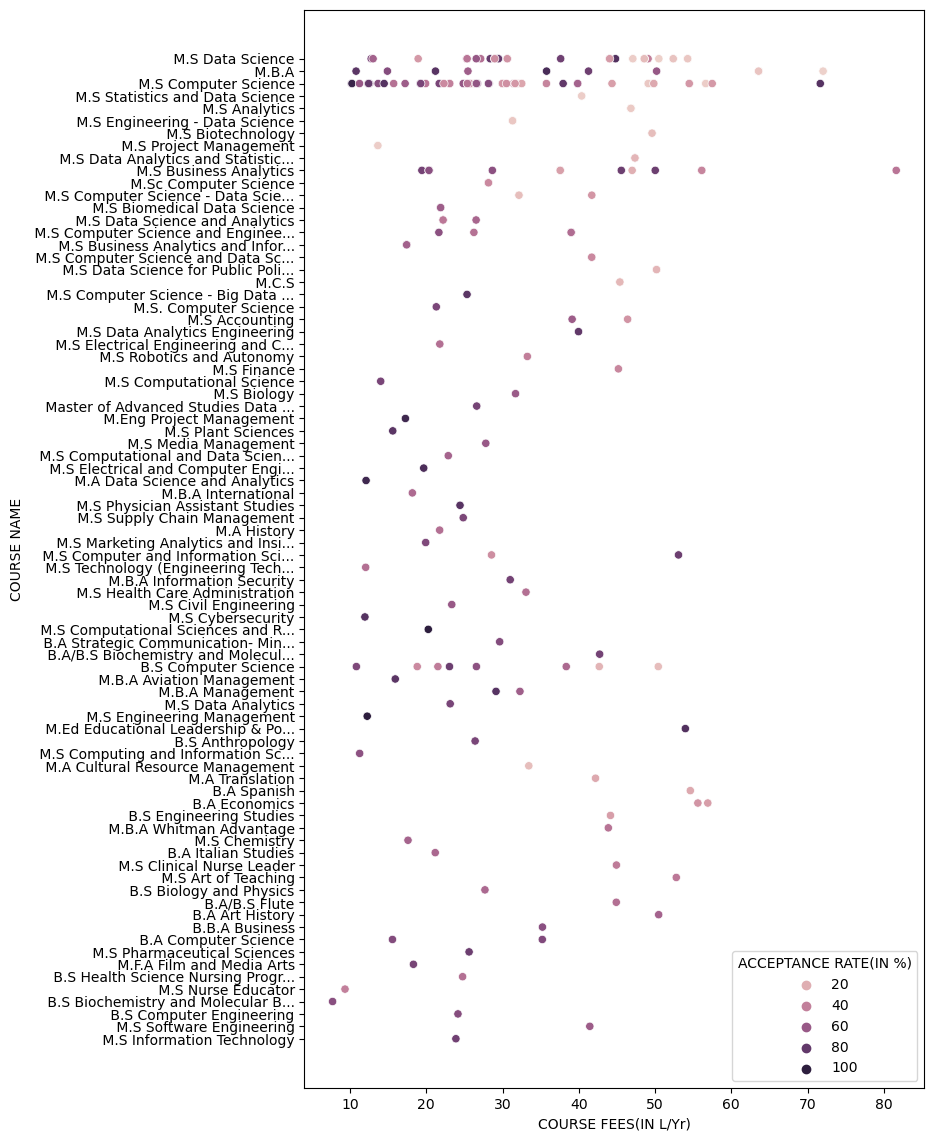

In [319]:
plt.figure(figsize=(8, 14))
sns.scatterplot(final_data['COURSE FEES(IN L/Yr)'],final_data['COURSE NAME'],hue=final_data['ACCEPTANCE RATE(IN %)'])

In [320]:
final_data.groupby('COURSE NAME').count()

,UNIVERSITY,LOCATION,ACCEPTANCE RATE(IN %),COURSE FEES(IN L/Yr),EXAM,RATING(10/10),RANK
COURSE NAME,,,,,,,
B.A Art History,1,1,1,1,1,1,1
B.A Computer Science,2,2,2,2,2,2,2
B.A Economics,2,2,2,2,2,2,2
B.A Italian Studies,1,1,1,1,1,1,1
B.A Spanish,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
M.S Supply Chain Management,1,1,1,1,1,1,1
M.S Technology (Engineering Tech...,1,1,1,1,1,1,1
M.S. Computer Science,1,1,1,1,1,1,1


- FINDING BEST UNIVERSITIES UNDER 20 L/Yr 

In [321]:
final_data[final_data["COURSE FEES(IN L/Yr)"] <= 20]

,UNIVERSITY,LOCATION,ACCEPTANCE RATE(IN %),COURSE NAME,COURSE FEES(IN L/Yr),EXAM,RATING(10/10),RANK
16,Northwestern University,"Illinois, USA",7.0,M.S Project Management,13.65,IELTS 7.0,7.70,Ranked 26 by THE
39,Purdue University,"Indiana, USA",56.0,M.S Business Analytics and Infor...,17.42,GRE 319 IELTS 7,5.70,Ranked 127 by THE
1,Northeastern University,"Massachusetts, USA",28.9,M.S Data Science,18.93,GRE 298 IELTS 6.5 PTE 53,9.50,Ranked 168 by THE
4,Texas A&M University,"Texas, USA",67.0,M.S Computer Science,13.68,IELTS 6 PTE 53,7.30,Ranked 181 by THE
5,University of Massachusetts,"Massachusetts, USA",65.5,M.S Computer Science,10.18,GRE 326 TOEFL 80 PTE 53,7.30,Ranked 191 by THE
8,Rutgers University - New Jersey,"New Jersey, USA",58.0,M.S Computer Science,12.36,TOEFL 83 PTE 68,6.80,Ranked 201 by THE
10,University of South Florida,"Florida, USA",47.0,M.S Computer Science,15.72,Duolingo 105 IELTS 6.5 PTE 53,8.30,Ranked 201 by THE
14,University of Illinois,"Illinois, USA",73.6,M.S Business Analytics,19.42,GRE 300 IELTS 6.5 PTE 54,7.20,Ranked 251 by THE
27,Saint Louis University,"Missouri, USA",58.0,M.S Computer Science,17.22,IELTS 6.5 PTE 53,7.00,Ranked 301 by THE
29,Florida State University,"Florida, USA",45.0,M.S Computer Science,19.91,GRE 295 IELTS 6.5 PTE 55,7.70,Ranked 301 by THE


- WHAT ARE THE BEST UNIVERSITIES UNDER 50 L/Yr?

In [322]:
final_data[final_data["COURSE FEES(IN L/Yr)"] > 50]

,UNIVERSITY,LOCATION,ACCEPTANCE RATE(IN %),COURSE NAME,COURSE FEES(IN L/Yr),EXAM,RATING(10/10),RANK
0,Harvard University,"Massachusetts, USA",5.6,M.S Data Science,50.49,GRE 292 TOEFL 100,7.5,Ranked 2 by THE
1,Stanford University,"California, USA",4.8,M.B.A,72.03,GMAT 730 TOEFL 100 PTE 68,8.0,Ranked 3 by THE
4,Princeton University,"New Jersey, USA",6.5,M.S Computer Science,56.64,GRE 298 TOEFL 100,7.3,Ranked 7 by THE
15,Duke University,"North Carolina, USA",10.8,M.S Data Science,52.38,GRE 315 IELTS 7.0,8.2,Ranked 25 by THE
24,Brown University,"Rhode Island, USA",9.3,M.S Data Science,54.27,TOEFL 80 PTE 54,8.5,Ranked 61 by THE
25,University of California,"California, USA",38.0,M.S Business Analytics,56.12,TOEFL 100,8.2,Ranked 63 by THE
29,Boston University,"Massachusetts, USA",29.4,M.S Computer Science,54.48,GRE 317 IELTS 7 PTE 54,7.7,Ranked 71 by THE
38,Dartmouth College,"New Hampshire, USA",10.6,M.B.A,63.57,GRE 296 IELTS 7 PTE 61,5.7,Ranked 123 by THE
41,Georgetown University,"District Of Columbia, USA",16.9,M.S Data Science for Public Poli...,50.19,GRE 322 TOEFL 90,6.7,Ranked 136 by THE
17,University of California,"California, USA",76.4,M.S Business Analytics,50.02,GRE 320 IELTS 7,7.8,Ranked 251 by THE


- TOP 10 COURSE NAMES WITH THE HIGHEST NO. OF COURSES

In [323]:
final_data["COURSE NAME"].value_counts().head(10)

 M.S Computer Science                   69
 M.S Data Science                       41
 M.S Business Analytics                 14
 M.B.A                                  13
 B.S Computer Science                    8
 M.S Computer Science and Enginee...     5
 M.S Data Science and Analytics          4
 M.S Analytics                           3
 M.S Engineering - Data Science          3
 M.S Project Management                  3
Name: COURSE NAME, dtype: int64

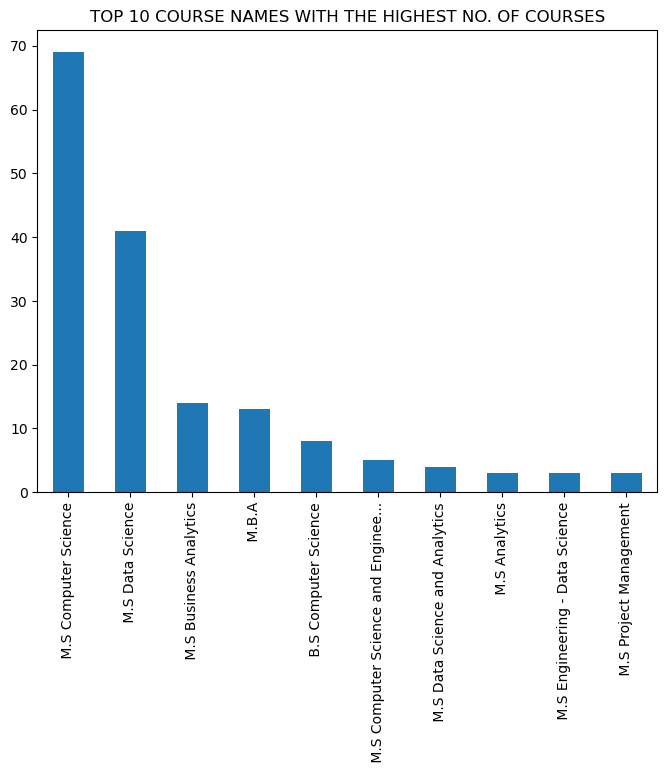

In [324]:
# plot the graph
plt.figure(figsize = (8,6))
final_data["COURSE NAME"].value_counts().head(10).plot(kind = "bar").set_title("TOP 10 COURSE NAMES WITH THE HIGHEST NO. OF COURSES")
plt.show()

## CONCLUSION:-